In [1]:
# -*- coding: utf-8 -*-

"""
@Time        : 7/1/2023
@Author      : purmortal
@File        : plot_gist_aggregation
@Description : 
"""
import sys

from utils import  *
import gist_plot as gist_plot
import gist_mass_fraction_plot as gist_mass_fraction_plot
from weights_loader import weights

import matplotlib

from multiprocessing import Pool
from astropy.io import fits
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.stats import pearsonr
from spectres import spectres
import numpy as np

import os


# Define your own paths
fig_path = './figs/L0x0p1' # path to save figs
cube_gist_path = '/Users/selilium/galcraft_test/test_gistplot/regularization/L0p1/'
cube_gist_run = 'resultsRevisedMEr1'
fraction_type = 'mass fraction'


# To Michael:
# For your case, the below path should work
#fig_path = './fig/' # path to save figs
#cube_gist_path = '/ourdisk/hpc/galacticos/data/dont_archive/datacubes/galcraft_test/' # path of gist products
#cube_gist_run = 'resultsRevisedREmdeg4' # folder name of GIST products
#fraction_type = 'mass fraction' # Depending on whether the SSP spectra is normalized to one solar mass or one solar luminosity



ModuleNotFoundError: No module named 'plotbin'

In [ ]:
fig_path_run = fig_path  + cube_gist_run
print (fig_path, cube_gist_run, fig_path_run)
if os.path.exists(fig_path_run) == False:
    os.mkdir(fig_path_run)

cube_gist_run_path = cube_gist_path + cube_gist_run + '/'
filename = cube_gist_run_path + cube_gist_run

cmap_color = 'sauron'

./figs/L0x0p1 resultsRevisedMEr1 ./figs/L0x0p1resultsRevisedMEr1


# Weighted average

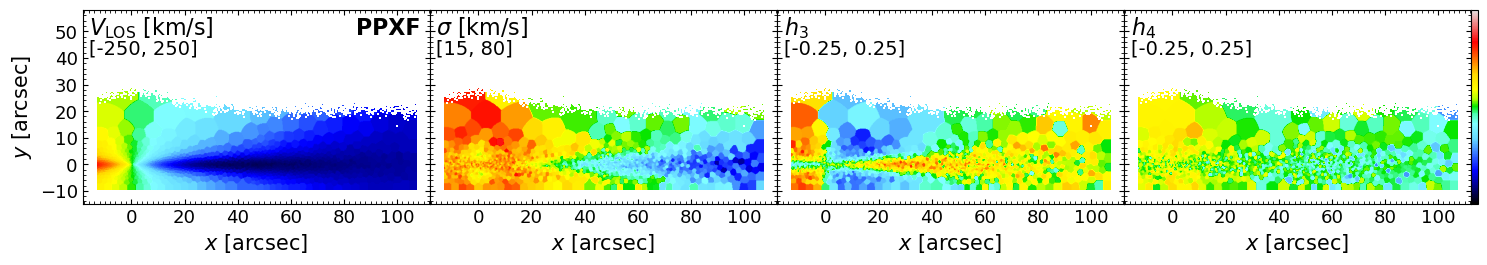

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# KIN
vminmax = np.array([[[-250, 250], [15, 80], [-0.25, 0.25], [-0.25, 0.25]]])
result_l = gist_plot.read_results_kin(filename, [''])
fig_kin = gist_plot.plot_kin(filename, ['PPXF'], result_l=result_l, vminmax=vminmax,
                use_vminmax=[True], residual=[False], cmap_l=[cmap_color] * len(result_l))
fig_kin.savefig(fig_path_run + '/test_kin_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

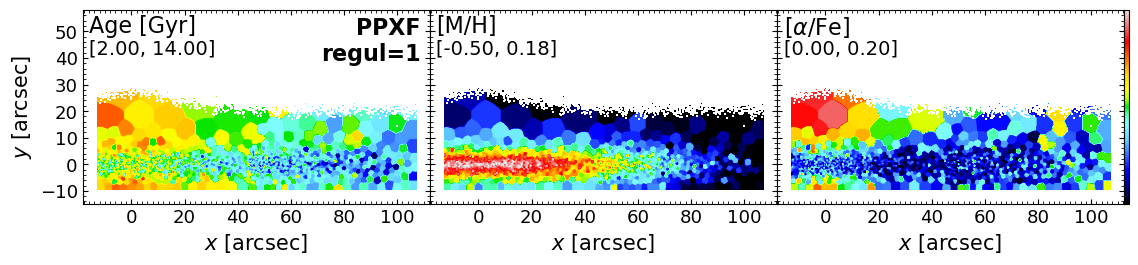

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# SFH
sfh_header = fits.open(filename + '_sfh.fits')[1].header
if sfh_header['HIERARCH REGUL_ERR'] == None:
    regul = 0
else:
    regul = 1 / sfh_header['HIERARCH REGUL_ERR']


vminmax = np.array([[[2, 14], [-0.5, 0.18], [0, 0.2]]])
result_l = gist_plot.read_results_sfh(filename, flag=['SFH'], suffix=[''])
fig_sfh = gist_plot.plot_sfh(filename, ['PPXF\nregul=' + str(int(regul))],
                             result_l=result_l, vminmax=vminmax, use_vminmax=[True],
                             residual=[False], cmap_l=[cmap_color] * len(result_l))
res_age_array = np.unique(result_l[-1][:, 0])
res_metal_array = np.unique(result_l[-1][:, 1])
res_alpha_array = np.unique(result_l[-1][:, 2])
fig_sfh.savefig(fig_path_run + '/test_sfh_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

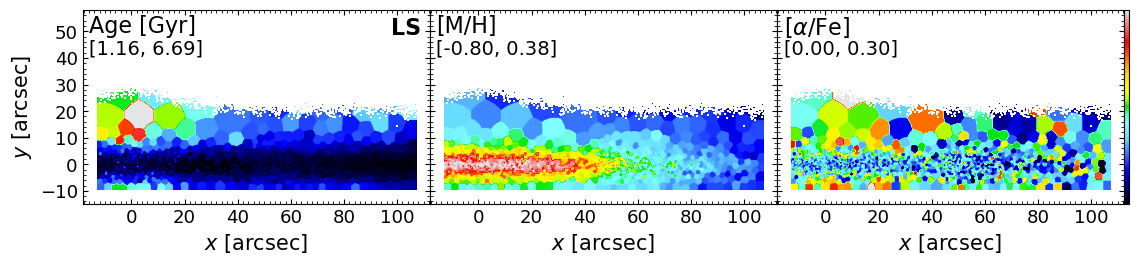

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# LS
if os.path.exists(filename + '_ls_AdapRes.fits'):
    result_l = gist_plot.read_results_sfh(filename, flag=['LS'], suffix=[''])
    fig_ls = gist_plot.plot_sfh(filename, ['LS'], result_l=result_l, use_vminmax=[False], cmap_l=[cmap_color] * len(result_l))
    fig_ls.savefig(fig_path_run + '/test_sfh_ls_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

# Global Mass distribution

In [ ]:
ppxf_weights = weights(cube_gist_path, cube_gist_run, mode='ppxf', fraction_type=fraction_type)
true_weights = weights(cube_gist_path, cube_gist_run, mode='true', fraction_type=fraction_type)

# To Michael:
# ppxf_weights are the weights that obtained from PPXF spectral fitting
# true_weights here are the weights that I calculated by myself as the "true" value 
# in the GalCraft paper to compare with PPXF weights, you can change it to your nGIST
# results by changing the 'cube_gist_path' and 'cube_gist_run', mode='ppxf' keywords 

/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:236: RuntimeWarning: divide by zero encountered in log10
  log_wdf = np.log10(np.nansum(cumulative_weights_2d, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:237: RuntimeWarning: divide by zero encountered in log10
  log_wdf_nuclear = np.log10(np.nansum(weights_nuclear, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:238: RuntimeWarning: divide by zero encountered in log10
  log_wdf_bulge = np.log10(np.nansum(weights_bulge, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:239: RuntimeWarning: divide by zero encountered in log10
  log_wdf_thin = np.log10(np.nansum(weights_thin, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:240: RuntimeWarning: divide by zero encountered in log10
  log_wdf_thick = np.log10(np.nansum(weights_thick, axis=

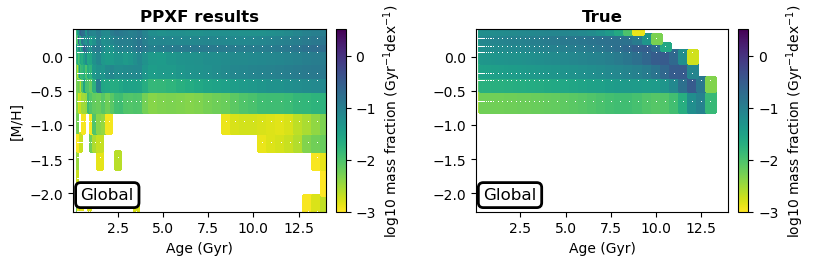

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# mass/light-fraction distribution



fig_mft = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf], [true_weights.log_wdf]],
                                [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                                [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                                ['Global'], ['PPXF results', 'True'], vmin=-3, vmax=0.5,
                                axes_pad=[1.3, 0.3], cbar_mode='each', cbar_location='right', cbar_pad=0.1,
                                cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig_mft.tight_layout(pad=0.15)
fig_mft.savefig(fig_path_run + '/2dmfd_global_massperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

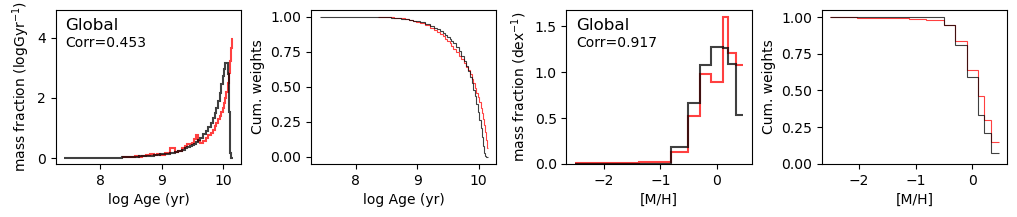

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage, logage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

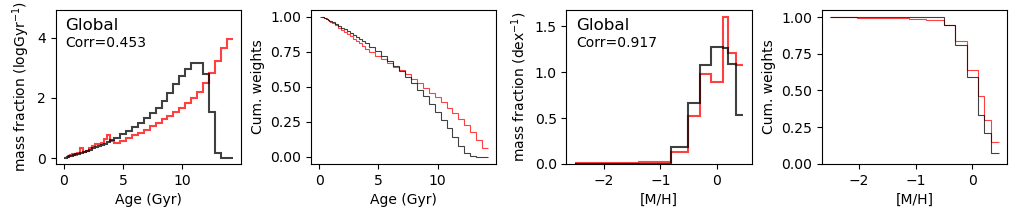

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

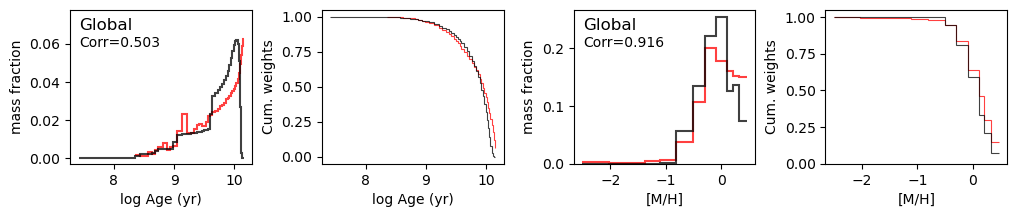

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution in log age space
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

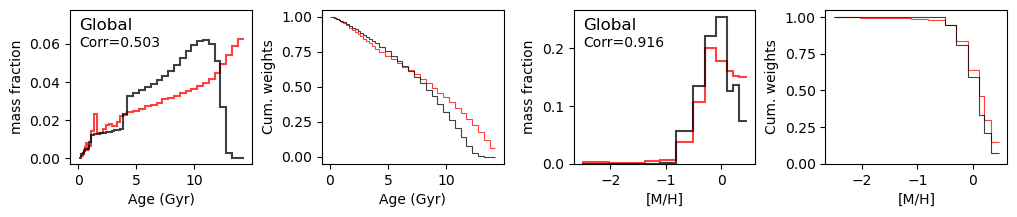

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

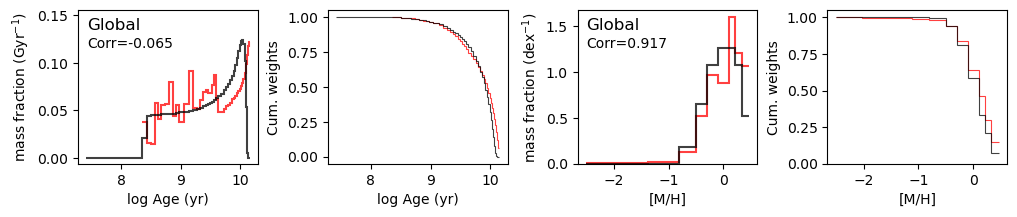

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

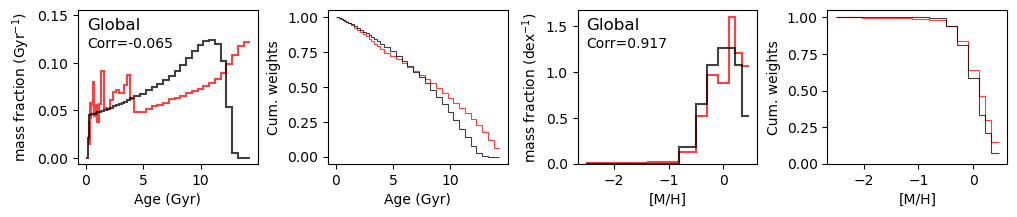

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

# Mass distribution of different components

/var/folders/2_/44rr6rk915g7v4b1dstqddh40000gn/T/ipykernel_2264/3790648592.py:11: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),


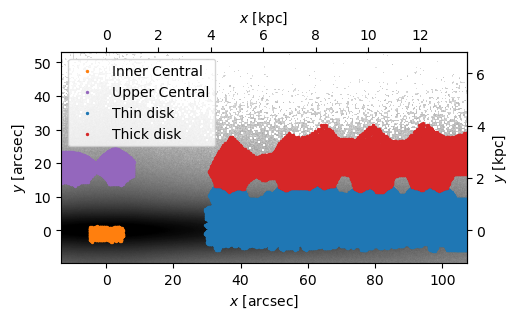

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot components distribution

def arcsec2dist(arc):
    return 26500 * arc / 3600 * np.pi / 180

def dist2arcsec(dist):
    return dist * 180 / np.pi * 3600 / 26500

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),
          extent=[np.min(ppxf_weights.results_table['X']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['X']) + ppxf_weights.pixelsize / 2,
                  np.min(ppxf_weights.results_table['Y']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['Y']) + ppxf_weights.pixelsize / 2])
ax.scatter(ppxf_weights.results_nuclear['X'], ppxf_weights.results_nuclear['Y'], s=2, c='tab:orange', label='Inner Central')
ax.scatter(ppxf_weights.results_bulge['X'], ppxf_weights.results_bulge['Y'], s=2, c='tab:purple', label='Upper Central')
ax.scatter(ppxf_weights.results_thin['X'], ppxf_weights.results_thin['Y'], s=2, c='tab:blue', label='Thin disk')
ax.scatter(ppxf_weights.results_thick['X'], ppxf_weights.results_thick['Y'], s=2, c='tab:red', label='Thick disk')
ax.set_xlabel(r'$x$ [arcsec]')
ax.set_ylabel(r'$y$ [arcsec]')
secaxx = ax.secondary_xaxis('top', functions=(arcsec2dist, dist2arcsec))
secaxx.set_xlabel(r'$x$ [kpc]')
secaxy = ax.secondary_yaxis('right', functions=(arcsec2dist, dist2arcsec))
secaxy.set_ylabel(r'$y$ [kpc]')
plt.legend()
plt.tight_layout(pad=0.01)
plt.savefig(fig_path_run + '/galaxy_components_' + cube_gist_run + '.png', dpi=500)

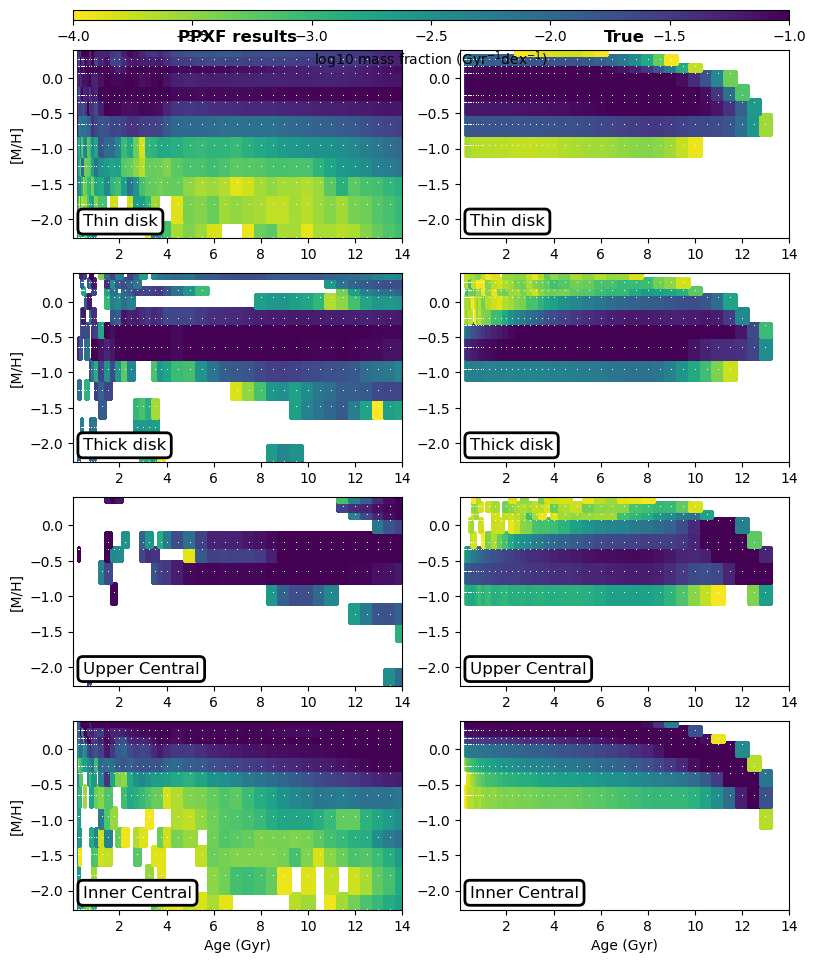

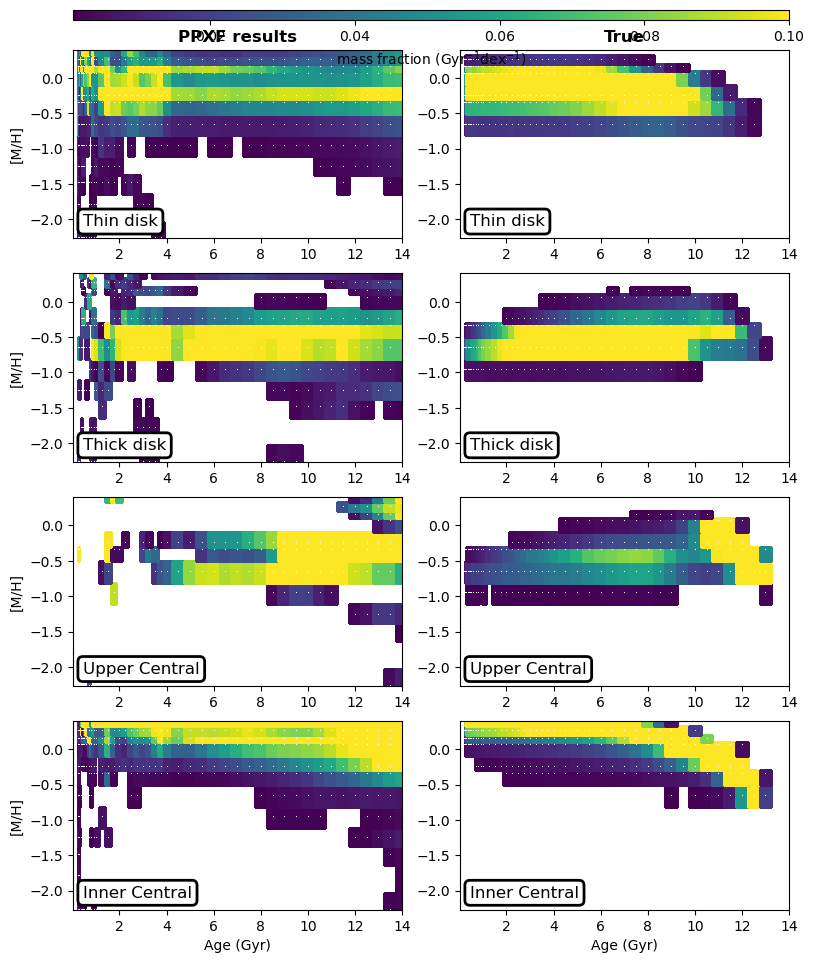

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf_thin, ppxf_weights.log_wdf_thick, ppxf_weights.log_wdf_bulge, ppxf_weights.log_wdf_nuclear],
                             [true_weights.log_wdf_thin, true_weights.log_wdf_thick, true_weights.log_wdf_bulge, true_weights.log_wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin= -4, vmax= -1, 
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_logweightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.wdf_thin, ppxf_weights.wdf_thick, ppxf_weights.wdf_bulge, ppxf_weights.wdf_nuclear],
                             [true_weights.wdf_thin, true_weights.wdf_thick, true_weights.wdf_bulge, true_weights.wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin=0.001, vmax=0.1,
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'%s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_weightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

In [ ]:
print("wdf_thin:", ppxf_weights.wdf_thin.shape)
print("age grid:", ppxf_weights.age_grid_2d.shape)
print("metal grid:", ppxf_weights.metal_grid_2d.shape)


wdf_thin: (43, 12)
age grid: (43, 12, 2)
metal grid: (43, 12, 2)


In [ ]:
for attr in dir(ppxf_weights):
    try:
        arr = getattr(ppxf_weights, attr)
        if isinstance(arr, np.ndarray):
            print(attr, arr.shape)
    except:
        pass


age_grid_2d (43, 12, 2)
alpha_grid_2d (43, 12, 2)
bin_areas (28,)
bin_edges (29,)
cumulative_weights_2d (43, 12, 2)
flux_reshape (315, 603)
grid_area_2d (43, 12, 2)
grid_area_2d_log (43, 12, 2)
log_wdf (43, 12)
log_wdf_bulge (43, 12)
log_wdf_innerthick (43, 12)
log_wdf_innerthin (43, 12)
log_wdf_nuclear (43, 12)
log_wdf_outerthick (43, 12)
log_wdf_outerthin (43, 12)
log_wdf_thick (43, 12)
log_wdf_thin (43, 12)
mean_alpha_grids_bulge (43, 12)
mean_alpha_grids_nuclear (43, 12)
mean_alpha_grids_thick (43, 12)
mean_alpha_grids_thin (43, 12)
metal (12,)
metal_bulge (12,)
metal_grid_2d (43, 12, 2)
metal_nuclear (12,)
metal_thick (12,)
metal_thin (12,)
original_weights_values (1382, 1032)
reg_dim (3,)
statistic_sfh (28,)
statistic_sfh_bulge (28,)
statistic_sfh_innerthick (28,)
statistic_sfh_innerthin (28,)
statistic_sfh_nuclear (28,)
statistic_sfh_outerthick (28,)
statistic_sfh_outerthin (28,)
statistic_sfh_thick (28,)
statistic_sfh_thin (28,)
wdf (43, 12)
wdf_bulge (43, 12)
wdf_innerthick (4

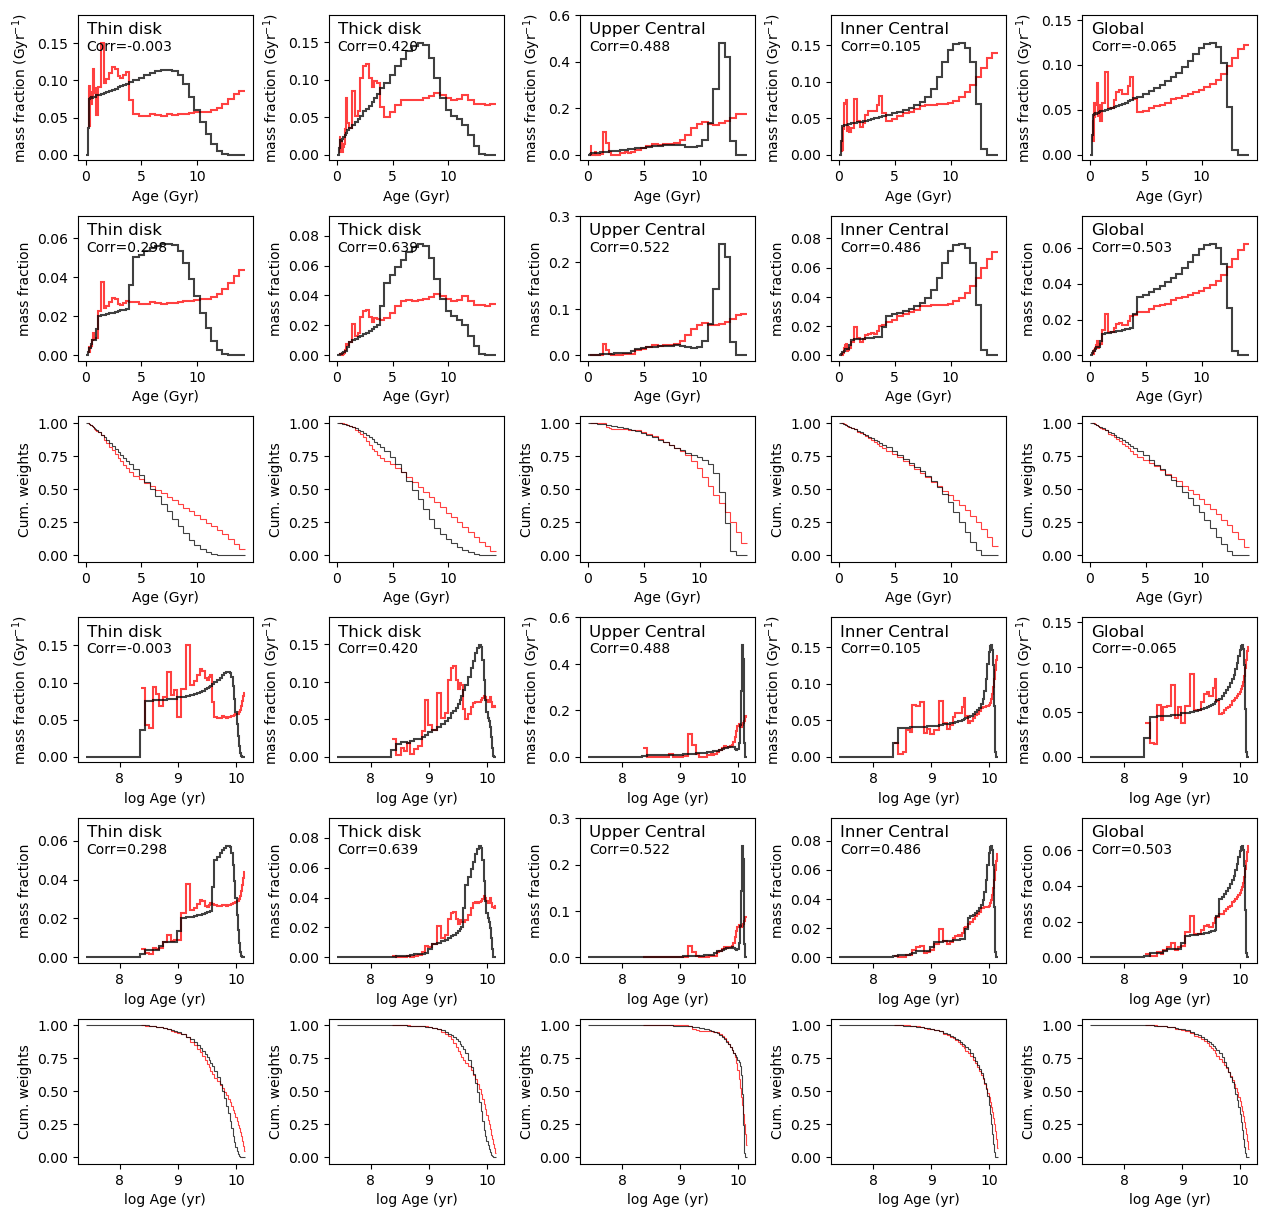

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# star formation history in log ang linear age space with cumulative figures
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_stairs', 'age_cum', 'logage_stairs', 'logage_stairs', 'logage_cum'],
                            perbinsize_list=[True, False, None, True, False, None],
                            logmass_list=[False, False, False, False, False, False],
                            show_corr_list=[True, True, False, True, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
plt.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
plt.savefig(fig_path_run + '/1dmfd_components_weightsmassperGyr_linlogage_' + cube_gist_run + '.pdf', dpi=500)


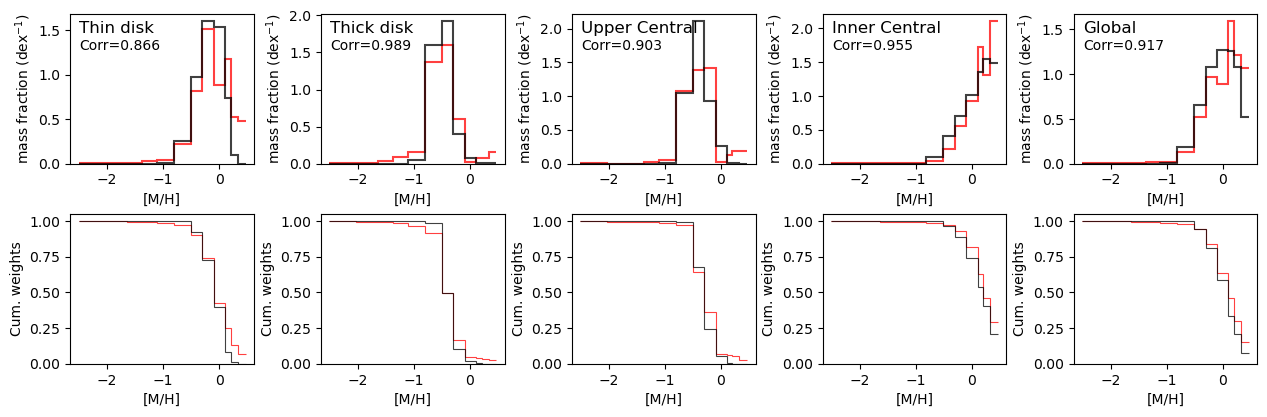

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 1d metallicity distribution and cumulative distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, False],
                            logmass_list=[False, False],
                            show_corr_list=[True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
fig.savefig(fig_path_run + '/1dmfd_components_weightsperdex_metal_' + cube_gist_run + '.pdf', dpi=500)

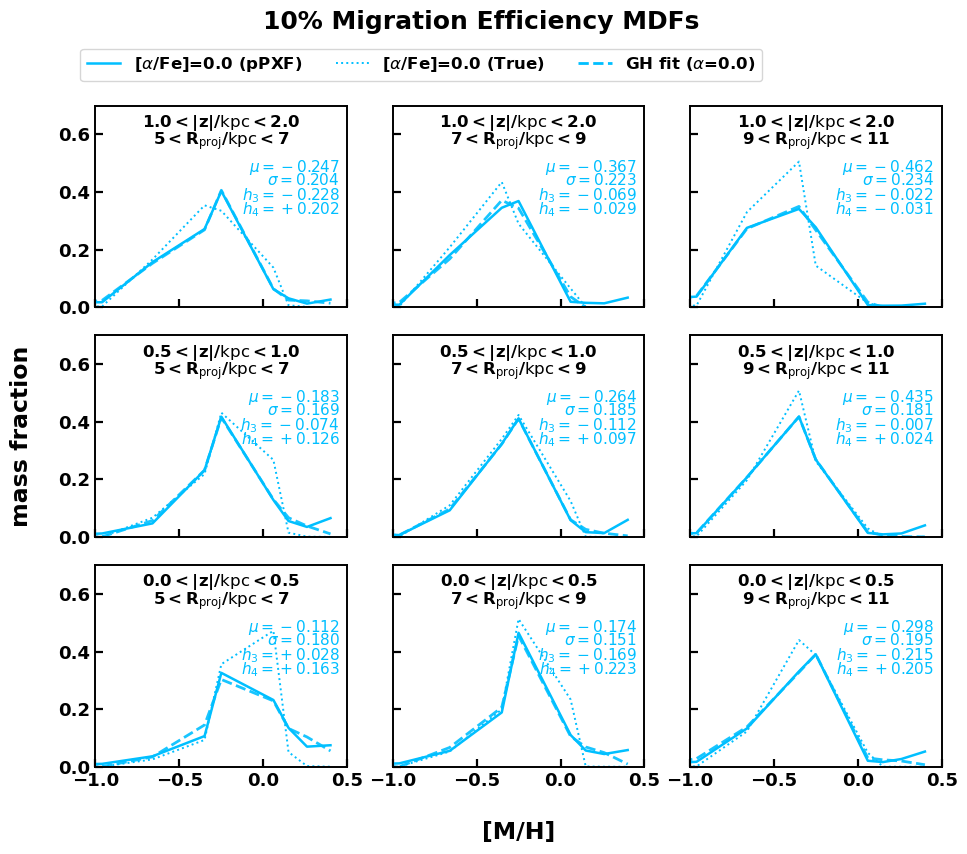

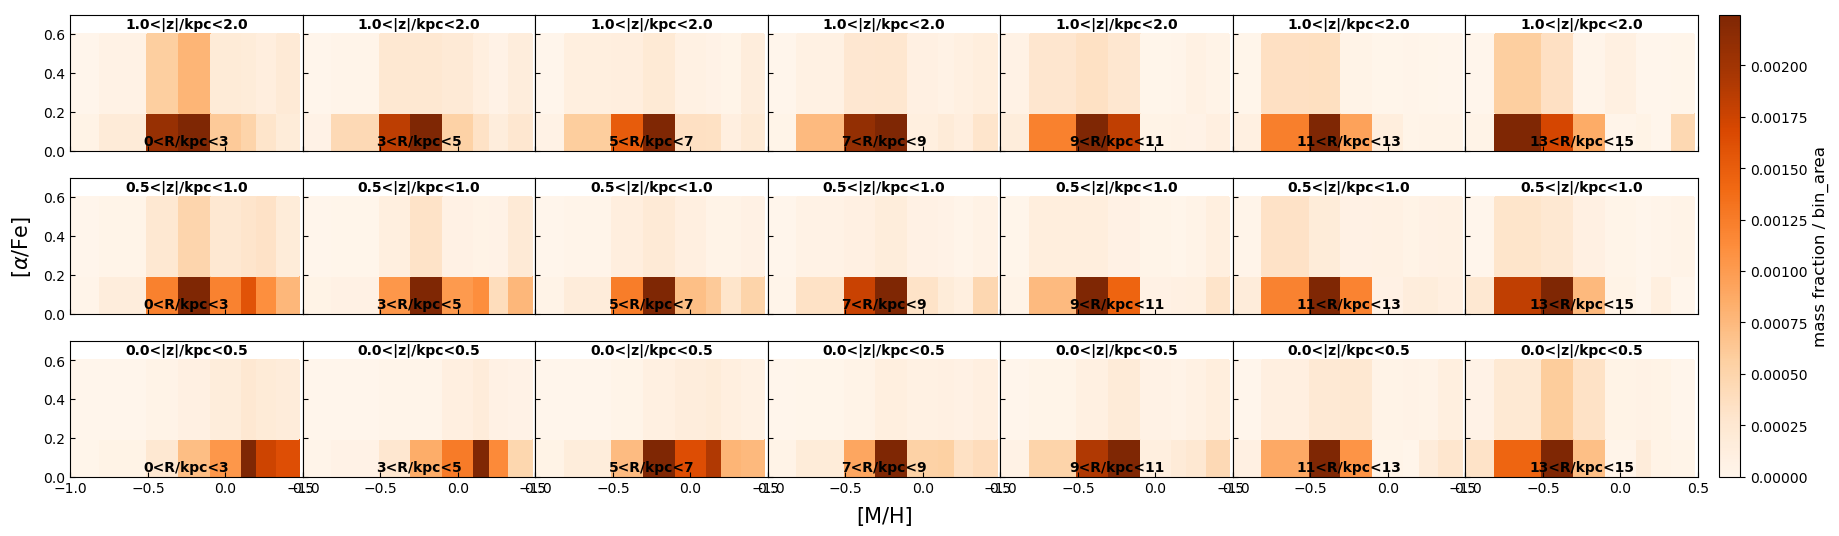

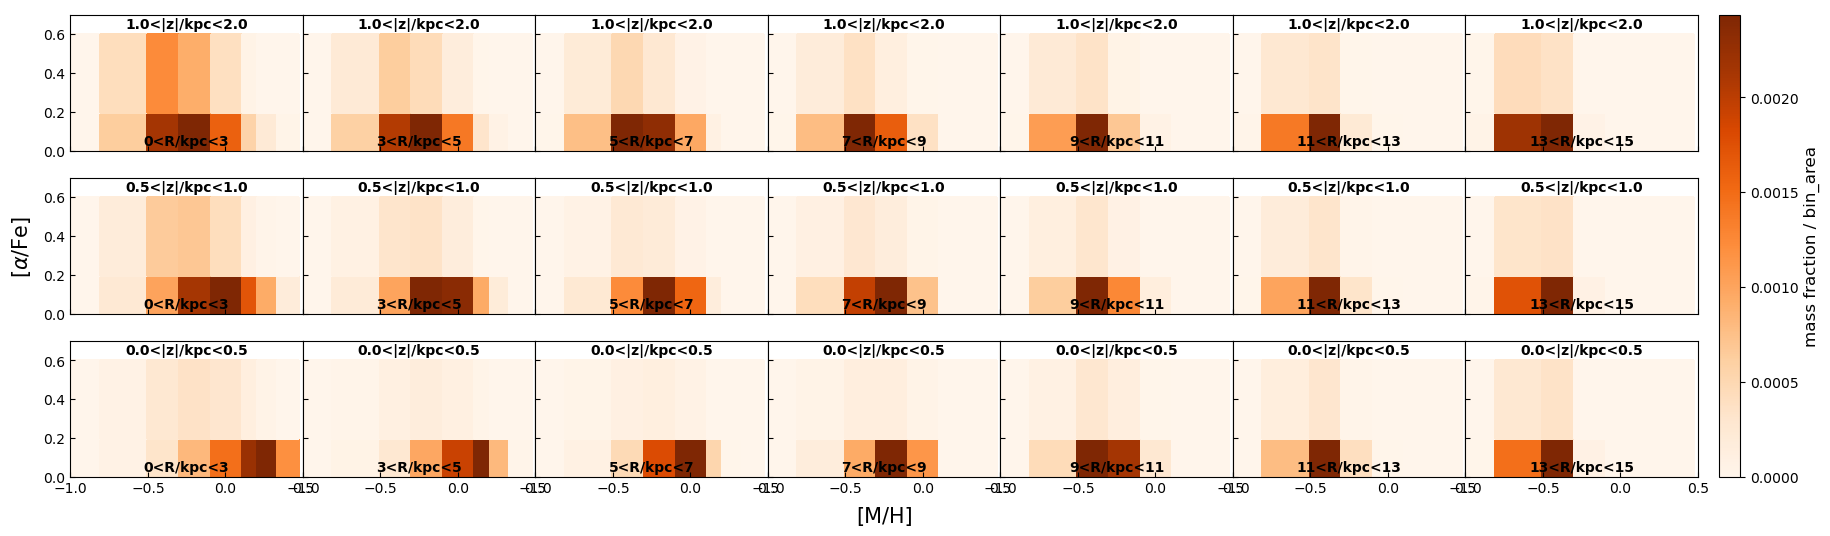

In [ ]:
# The Metallicity Distribution Functions (MDFs) and [alpha/Fe] vs [M/H] in R-Z bins

if ppxf_weights.reg_dim[2] > 1 and true_weights.reg_dim[2] > 1:

    d = 26500  # kpc
    rbin = np.array([0, 3, 5, 7, 9, 11, 13, 15])
    zbin = np.array([0, 0.5, 1, 2])

    fig_maprzhist, fit_results = gist_mass_fraction_plot.plot_mh_alpha_rz_hist(
        ppxf_weights.weights_values,
        true_weights.weights_values,
        rbin,
        zbin,
        d,
        ppxf_weights.reg_dim,
        true_weights.reg_dim,
        ppxf_weights.results_table,
        metal_grid=ppxf_weights.metal_grid_2d[0, :, 0],
        metal_grid_true=true_weights.metal_grid_2d[0, :, 0],
        fraction_type=fraction_type
    )

    fig_maprzhist.savefig(
        fig_path_run + '/alphafe_mh_rz_hist_' + cube_gist_run + '.pdf',
        dpi=500
    )


    fig_maprz = gist_mass_fraction_plot.plot_mh_alpha_rz(ppxf_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=ppxf_weights.reg_dim, \
                                                         metal_grid=ppxf_weights.metal_grid_2d[0, :, 0], alpha_grid=ppxf_weights.alpha_grid_2d[0, 0, :])
    fig_maprz.savefig(fig_path_run + '/alphafe_mh_rz_' + cube_gist_run + '.pdf', dpi=500)

    fig_maprz_true = gist_mass_fraction_plot.plot_mh_alpha_rz(true_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=true_weights.reg_dim, \
                                                              metal_grid=true_weights.metal_grid_2d[0, :, 0], alpha_grid=true_weights.alpha_grid_2d[0, 0, :])
    fig_maprz_true.savefig(fig_path_run + '/alphafe_mh_rz_true' + cube_gist_run + '.pdf', dpi=500)

In [ ]:
# ============================================
#   PRINT ALL MEAN, SIGMA, h3 FOR ALPHA = 0.0
# ============================================

# fit_results structure reminder:
# {
#   "zbin": (z_low, z_high),
#   "rbin": (r_low, r_high),
#   "mu": float,
#   "sigma": float,
#   "h3": float,
#   "h4": float
# }

# No need to filter — ALL panels are α = 0.0 in your blue-only GH run
blue_results = fit_results  

# Storage lists
mean_list  = []   # (z_low, z_high, r_low, r_high, mu)
sigma_list = []   # (z_low, z_high, r_low, r_high, sigma)
h3_list    = []   # (z_low, z_high, r_low, r_high, h3)

# Extract values from fit_results
for entry in blue_results:
    z_low, z_high = entry["zbin"]
    r_low, r_high = entry["rbin"]

    mean_list.append( (z_low, z_high, r_low, r_high, entry["mu"]) )
    sigma_list.append((z_low, z_high, r_low, r_high, entry["sigma"]))
    h3_list.append(   (z_low, z_high, r_low, r_high, entry["h3"]) )


# ============================================
#                PRETTY PRINTING
# ============================================

print("\n===================== MEANS (μ) FOR α = 0.0 =====================")
for z1, z2, r1, r2, mu in mean_list:
    print(f"|z| = {z1}-{z2} kpc,   R = {r1}-{r2} kpc   →   μ = {mu:+.4f}")

print("\n===================== SIGMAS (σ) FOR α = 0.0 ====================")
for z1, z2, r1, r2, s in sigma_list:
    print(f"|z| = {z1}-{z2} kpc,   R = {r1}-{r2} kpc   →   σ = {s:.4f}")

print("\n===================== SKEWNESS h₃ FOR α = 0.0 ===================")
for z1, z2, r1, r2, h3 in h3_list:
    print(f"|z| = {z1}-{z2} kpc,   R = {r1}-{r2} kpc   →   h₃ = {h3:+.4f}")




===================== MEANS (μ) FOR α = 0.0 =====================

===================== SIGMAS (σ) FOR α = 0.0 ====================

===================== SKEWNESS h₃ FOR α = 0.0 ===================


===================== MEANS (μ) FOR α = 0.0 =====================

L0x0p1:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   μ = +0.1976
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   μ = -0.1382
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   μ = -0.2668
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   μ = -0.0068
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   μ = -0.1519
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   μ = -0.2622
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   μ = -0.1119
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   μ = -0.1834
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   μ = -0.2465
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   μ = -0.1739
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   μ = -0.2643
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   μ = -0.3669
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   μ = -0.2985
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   μ = -0.4347
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   μ = -0.4622
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   μ = -0.4672
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   μ = -0.4873
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   μ = -0.4934
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   μ = -0.5124
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   μ = -0.5220
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   μ = -0.5085

L0x0p5:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   μ = +0.1711
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   μ = -0.1209
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   μ = -0.3183
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   μ = +0.0478
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   μ = -0.1534
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   μ = -0.2826
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   μ = -0.1098
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   μ = -0.1623
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   μ = -0.2894
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   μ = -0.1714
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   μ = -0.2544
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   μ = -0.4024
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   μ = -0.2738
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   μ = -0.3390
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   μ = -0.4127
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   μ = -0.4818
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   μ = -0.4551
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   μ = -0.4968
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   μ = -0.4891
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   μ = -0.5535
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   μ = -0.5533

L0x2:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   μ = +0.0953
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   μ = -0.1152
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   μ = -0.2672
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   μ = +0.0494
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   μ = -0.1335
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   μ = -0.2479
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   μ = -0.1099
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   μ = -0.1359
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   μ = -0.2953
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   μ = -0.1204
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   μ = -0.1677
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   μ = -0.2360
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   μ = -0.1342
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   μ = -0.2450
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   μ = -0.2233
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   μ = -0.2309
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   μ = -0.2687
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   μ = -0.2243
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   μ = -0.3257
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   μ = -0.3895
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   μ = -0.4976

===================== SIGMAS (σ) FOR α = 0.0 ====================

L0x0p1:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   σ = 0.3365
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   σ = 0.2058
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   σ = 0.1954
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   σ = 0.2113
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   σ = 0.1698
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   σ = 0.2129
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   σ = 0.1802
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   σ = 0.1690
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   σ = 0.2037
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   σ = 0.1508
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   σ = 0.1852
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   σ = 0.2233
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   σ = 0.1953
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   σ = 0.1809
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   σ = 0.2337
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   σ = 0.1630
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   σ = 0.1824
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   σ = 0.1501
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   σ = 0.1572
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   σ = 0.1497
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   σ = 0.2609

L0x0p5:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   σ = 0.3299
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   σ = 0.2094
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   σ = 0.2607
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   σ = 0.3542
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   σ = 0.2332
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   σ = 0.2179
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   σ = 0.1787
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   σ = 0.1469
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   σ = 0.1846
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   σ = 0.1658
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   σ = 0.1738
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   σ = 0.2149
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   σ = 0.2038
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   σ = 0.1808
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   σ = 0.2366
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   σ = 0.2367
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   σ = 0.2234
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   σ = 0.2040
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   σ = 0.2050
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   σ = 0.2637
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   σ = 0.1671

L0x2:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   σ = 0.4340
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   σ = 0.2984
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   σ = 0.2581
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   σ = 0.4157
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   σ = 0.2447
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   σ = 0.4250
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   σ = 0.1725
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   σ = 0.2479
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   σ = 0.2897
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   σ = 0.1995
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   σ = 0.2235
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   σ = 0.2510
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   σ = 0.2125
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   σ = 0.3305
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   σ = 0.2127
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   σ = 0.4582
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   σ = 0.4126
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   σ = 0.4101
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   σ = 0.3687
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   σ = 0.2978
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   σ = 0.3467


===================== SKEWNESS h₃ FOR α = 0.0 ===================

L0x0p1:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   h₃ = -0.0781
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   h₃ = +0.1011
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   h₃ = +0.0210
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   h₃ = +0.0999
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   h₃ = -0.0041
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   h₃ = -0.1277
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   h₃ = +0.0281
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   h₃ = -0.0744
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   h₃ = -0.2278
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   h₃ = -0.1692
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   h₃ = -0.1123
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   h₃ = -0.0687
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   h₃ = -0.2147
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   h₃ = -0.0068
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   h₃ = -0.0222
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   h₃ = -0.0600
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   h₃ = -0.0218
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   h₃ = -0.0193
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   h₃ = -0.1207
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   h₃ = -0.0710
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   h₃ = +0.3791

L0x0p5:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   h₃ = -0.1065
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   h₃ = +0.0641
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   h₃ = -0.0288
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   h₃ = +0.1752
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   h₃ = +0.0755
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   h₃ = -0.0579
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   h₃ = +0.0396
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   h₃ = -0.1591
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   h₃ = -0.1689
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   h₃ = -0.1042
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   h₃ = -0.0675
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   h₃ = -0.0836
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   h₃ = -0.2509
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   h₃ = -0.1763
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   h₃ = -0.0575
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   h₃ = +0.0288
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   h₃ = -0.0094
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   h₃ = +0.0034
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   h₃ = -0.0260
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   h₃ = +0.4489
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   h₃ = +0.0617

L0x2:
|z| = 0.0-0.5 kpc,   R = 0-3 kpc   →   h₃ = +0.1072
|z| = 0.5-1.0 kpc,   R = 0-3 kpc   →   h₃ = +0.1672
|z| = 1.0-2.0 kpc,   R = 0-3 kpc   →   h₃ = +0.0046
|z| = 0.0-0.5 kpc,   R = 3-5 kpc   →   h₃ = +0.0367
|z| = 0.5-1.0 kpc,   R = 3-5 kpc   →   h₃ = +0.1418
|z| = 1.0-2.0 kpc,   R = 3-5 kpc   →   h₃ = +0.3729
|z| = 0.0-0.5 kpc,   R = 5-7 kpc   →   h₃ = +0.1294
|z| = 0.5-1.0 kpc,   R = 5-7 kpc   →   h₃ = +0.1310
|z| = 1.0-2.0 kpc,   R = 5-7 kpc   →   h₃ = +0.0269
|z| = 0.0-0.5 kpc,   R = 7-9 kpc   →   h₃ = +0.1118
|z| = 0.5-1.0 kpc,   R = 7-9 kpc   →   h₃ = +0.0313
|z| = 1.0-2.0 kpc,   R = 7-9 kpc   →   h₃ = +0.0302
|z| = 0.0-0.5 kpc,   R = 9-11 kpc   →   h₃ = +0.0415
|z| = 0.5-1.0 kpc,   R = 9-11 kpc   →   h₃ = +0.1489
|z| = 1.0-2.0 kpc,   R = 9-11 kpc   →   h₃ = -0.1248
|z| = 0.0-0.5 kpc,   R = 11-13 kpc   →   h₃ = +0.3234
|z| = 0.5-1.0 kpc,   R = 11-13 kpc   →   h₃ = +0.3066
|z| = 1.0-2.0 kpc,   R = 11-13 kpc   →   h₃ = +0.3581
|z| = 0.0-0.5 kpc,   R = 13-15 kpc   →   h₃ = +0.2873
|z| = 0.5-1.0 kpc,   R = 13-15 kpc   →   h₃ = +0.0510
|z| = 1.0-2.0 kpc,   R = 13-15 kpc   →   h₃ = -0.0411


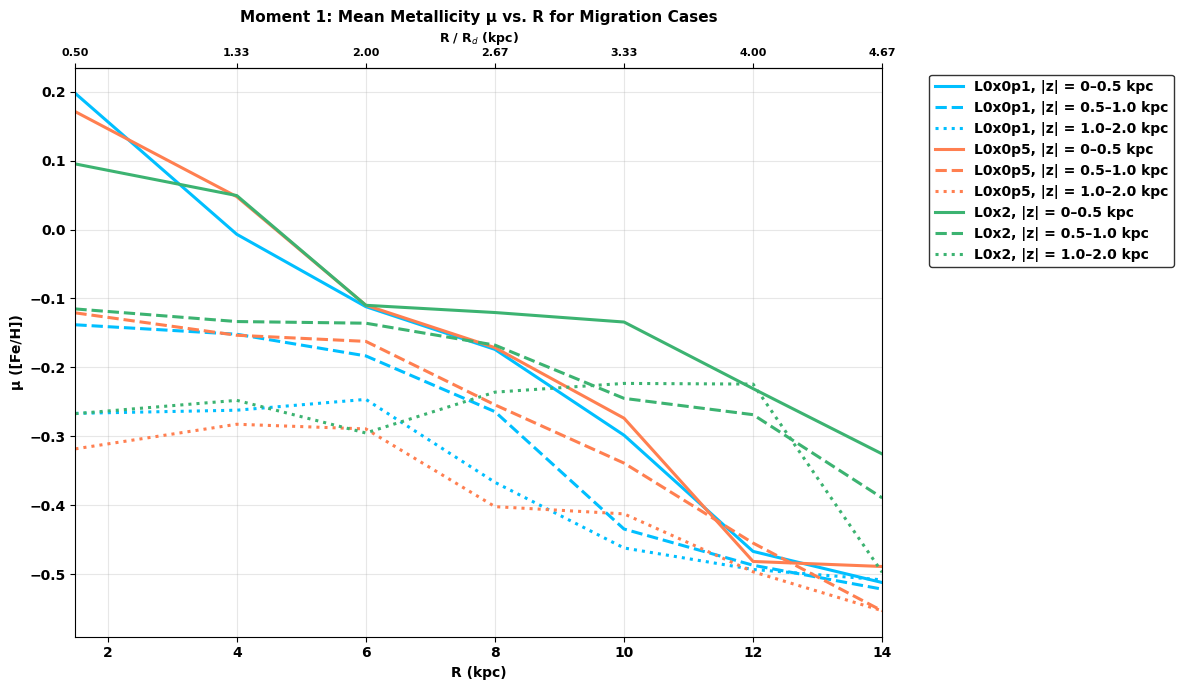

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ===============================
# NEW Moment 1: Mean μ values
# ===============================

L0x0p1 = {
    'z0': [0.1976, -0.0068, -0.1119, -0.1739, -0.2985, -0.4672, -0.5124],
    'z1': [-0.1382, -0.1519, -0.1834, -0.2643, -0.4347, -0.4873, -0.5220],
    'z2': [-0.2668, -0.2622, -0.2465, -0.3669, -0.4622, -0.4934, -0.5085]
}

L0x0p5 = {
    'z0': [0.1711, 0.0478, -0.1098, -0.1714, -0.2738, -0.4818, -0.4891],
    'z1': [-0.1209, -0.1534, -0.1623, -0.2544, -0.3390, -0.4551, -0.5535],
    'z2': [-0.3183, -0.2826, -0.2894, -0.4022, -0.4127, -0.4968, -0.5533]
}

L0x2 = {
    'z0': [0.0953, 0.0494, -0.1099, -0.1204, -0.1342, -0.2309, -0.3257],
    'z1': [-0.1152, -0.1335, -0.1359, -0.1677, -0.2450, -0.2687, -0.3895],
    'z2': [-0.2672, -0.2479, -0.2953, -0.2360, -0.2233, -0.2243, -0.4976]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

# Colors
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

# Linestyles for z-bins
linestyles = {'z0': '-', 'z1': '--', 'z2': ':'}

# Labels
zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ===============================
# Plot
# ===============================
plt.figure(figsize=(12, 7))

for cname, vals in cases.items():
    for zbin, mu_vals in vals.items():
        plt.plot(
            R, mu_vals,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,
            label=f"{cname}, {zlabels[zbin]}"
        )

# 🔥 FIX SIDE PADDING (chop off sides)
plt.xlim(R[0], R[-1])


# R/Rd axis on top
# --------------------------------
# Secondary top axis (R/Rd)
# --------------------------------
def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)", fontsize=9, fontweight='bold')

ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)],
                        fontsize=8, fontweight='bold')

# --------------------------------
# Labels & Title (BOLD)
# --------------------------------
plt.xlabel("R (kpc)", fontsize=10, fontweight='bold')
plt.ylabel("μ ([Fe/H])", fontsize=10, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R for Migration Cases",
          fontsize=11, fontweight='bold')

# --------------------------------
# Grid
# --------------------------------
plt.grid(alpha=0.3)

# --------------------------------
# Legend (boxed + bold)
# --------------------------------
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                 fontsize=10, frameon=True)

frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.0)

for text in leg.get_texts():
    text.set_fontweight('bold')

# --------------------------------
# Tick label bolding
# --------------------------------
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()




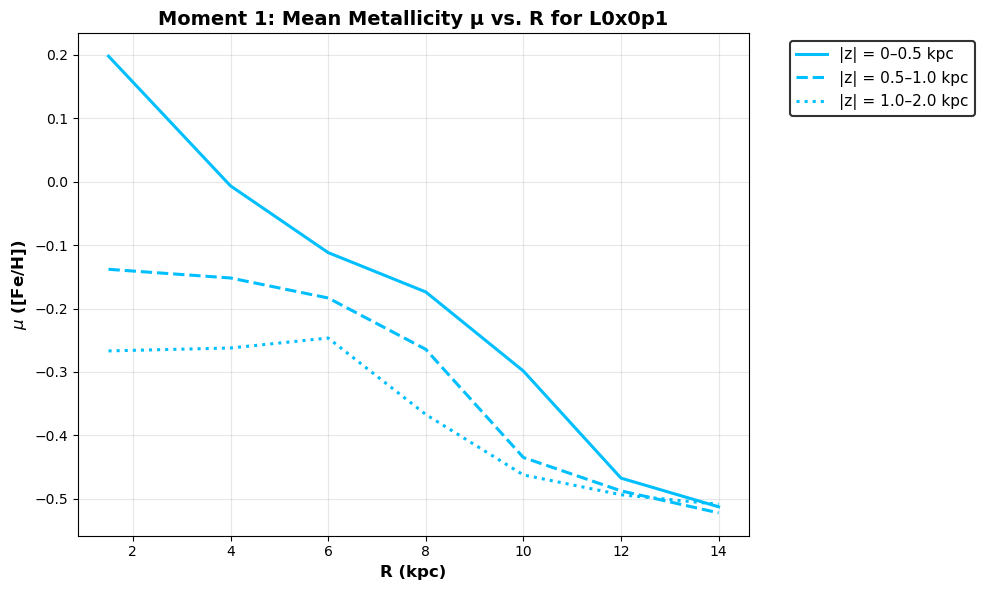

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# Mean metallicity arrays for L0x0p1
mu_z0 = np.array([0.1976, -0.0068, -0.1119, -0.1739, -0.2985, -0.4672, -0.5124])
mu_z1 = np.array([-0.1382, -0.1519, -0.1834, -0.2643, -0.4347, -0.4873, -0.5220])
mu_z2 = np.array([-0.2668, -0.2622, -0.2465, -0.3669, -0.4622, -0.4934, -0.5085])

plt.figure(figsize=(10,6))

plt.plot(R, mu_z0, color='deepskyblue', linestyle='-', linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, mu_z1, color='deepskyblue', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, mu_z2, color='deepskyblue', linestyle=':', linewidth=2.2, label='|z| = 1.0–2.0 kpc')

# Labels
plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\mu$ ([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R for L0x0p1", fontsize=14, fontweight='bold')

# Legend boxed
leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


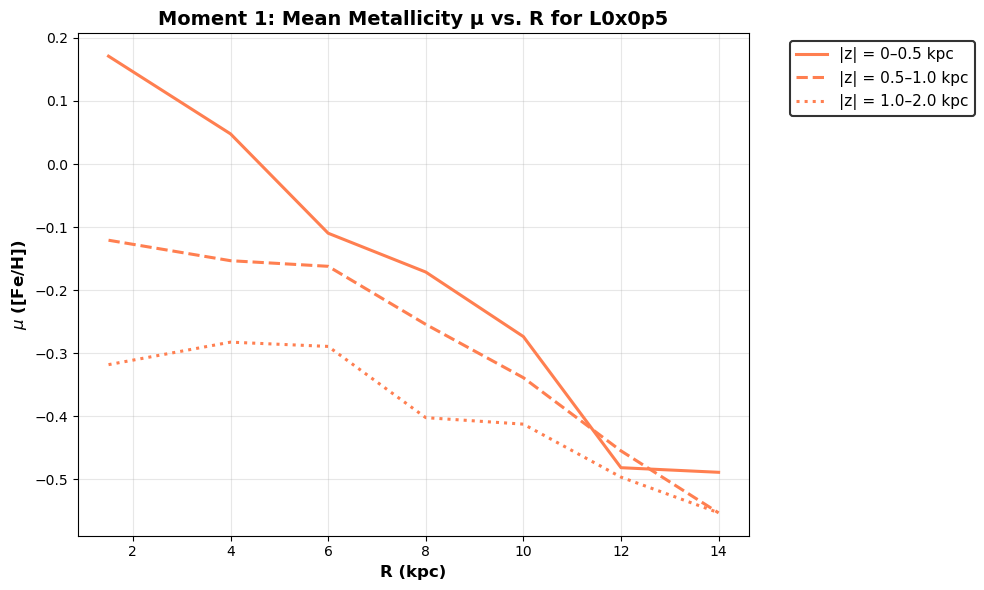

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# Mean metallicity arrays for L0x0p5
μ_z0_0p5 = [
    0.1711,
    0.0478,
    -0.1098,
    -0.1714,
    -0.2738,
    -0.4818,
    -0.4891
]
μ_z1_0p5 = [
    -0.1209,
    -0.1534,
    -0.1623,
    -0.2544,
    -0.3390,
    -0.4551,
    -0.5535
]
μ_z2_0p5 = [
    -0.3183,
    -0.2826,
    -0.2894,
    -0.4024,
    -0.4127,
    -0.4968,
    -0.5533
]
plt.figure(figsize=(10,6))

plt.plot(R, μ_z0_0p5, color='coral', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, μ_z1_0p5, color='coral', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, μ_z2_0p5, color='coral', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\mu$ ([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R for L0x0p5", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



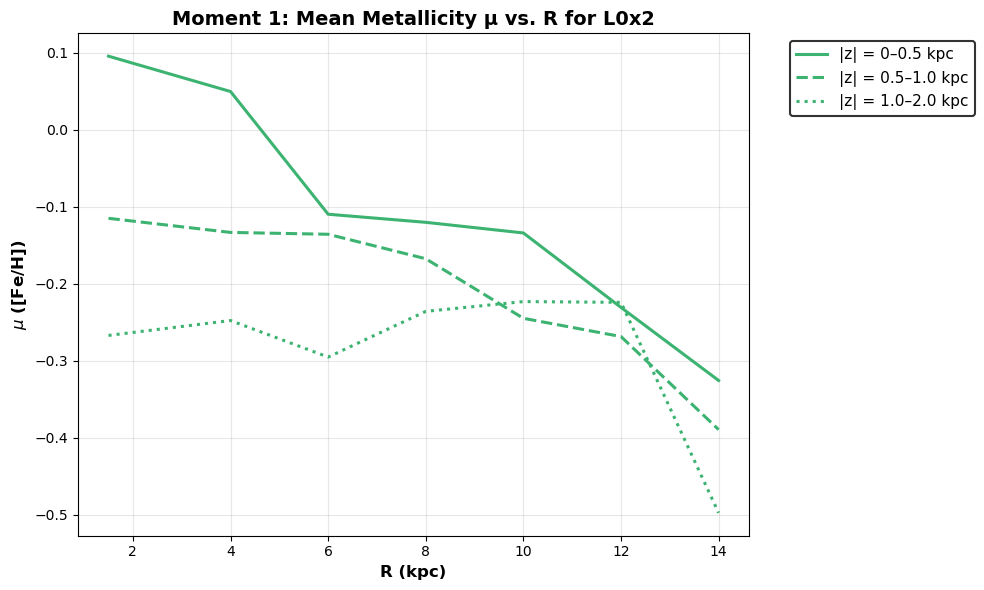

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# Mean metallicity arrays for L0x2
μ_z0_x2 = [
    0.0953,
    0.0494,
    -0.1099,
    -0.1204,
    -0.1342,
    -0.2309,
    -0.3257
]
μ_z1_x2 = [
    -0.1152,
    -0.1335,
    -0.1359,
    -0.1677,
    -0.2450,
    -0.2687,
    -0.3895
]
μ_z2_x2 = [
    -0.2672,
    -0.2479,
    -0.2953,
    -0.2360,
    -0.2233,
    -0.2243,
    -0.4976
]

plt.figure(figsize=(10,6))

plt.plot(R, μ_z0_x2, color='mediumseagreen', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, μ_z1_x2, color='mediumseagreen', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, μ_z2_x2, color='mediumseagreen', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\mu$ ([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R for L0x2", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



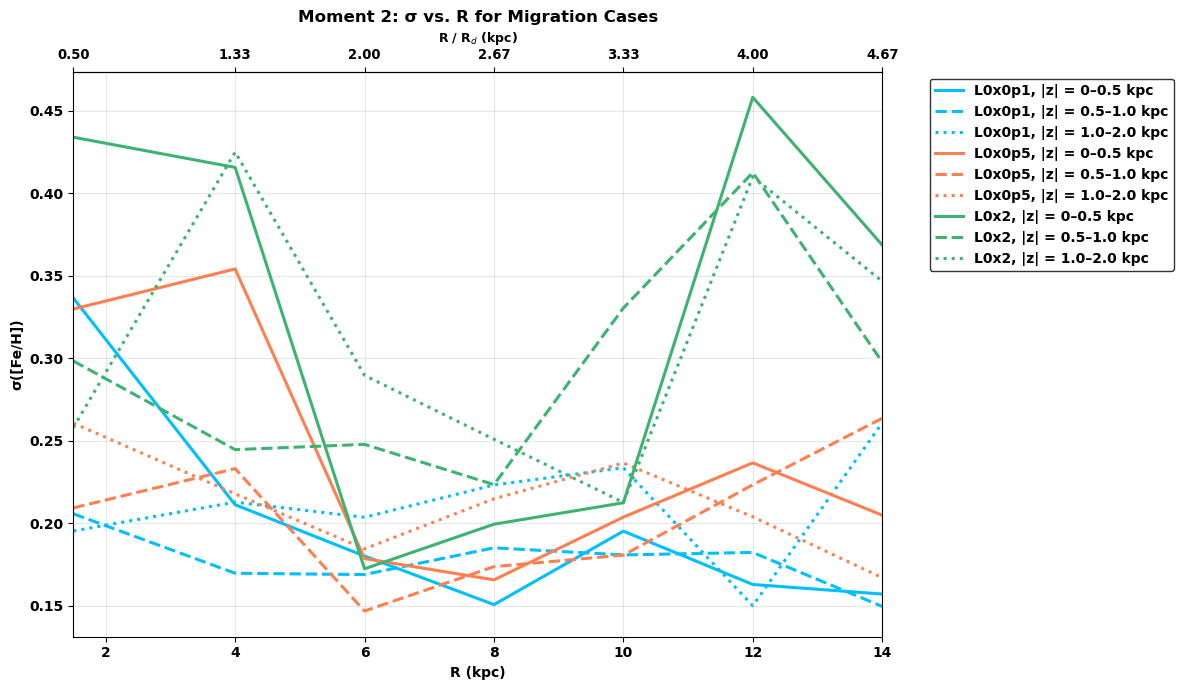

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# R midpoints (kpc)
# ------------------------------
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ------------------------------
# NEW SIGMA VALUES (EXACT FROM YOU)
# ------------------------------

L0x0p1 = {
    'z0': [0.3365, 0.2113, 0.1802, 0.1508, 0.1953, 0.1630, 0.1572],
    'z1': [0.2058, 0.1698, 0.1690, 0.1852, 0.1809, 0.1824, 0.1497],
    'z2': [0.1954, 0.2129, 0.2037, 0.2233, 0.2337, 0.1501, 0.2609]
}

L0x0p5 = {
    'z0': [0.3299, 0.3542, 0.1787, 0.1658, 0.2038, 0.2367, 0.2050],
    'z1': [0.2094, 0.2332, 0.1469, 0.1738, 0.1808, 0.2234, 0.2637],
    'z2': [0.2607, 0.2179, 0.1846, 0.2149, 0.2366, 0.2040, 0.1671]
}

L0x2 = {
    'z0': [0.4340, 0.4157, 0.1725, 0.1995, 0.2125, 0.4582, 0.3687],
    'z1': [0.2984, 0.2447, 0.2479, 0.2235, 0.3305, 0.4126, 0.2978],
    'z2': [0.2581, 0.4250, 0.2897, 0.2510, 0.2127, 0.4101, 0.3467]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

# Pretty aesthetic colors (publication quality)
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

# Linestyles for z-bins
linestyles = {'z0': '-', 'z1': '--', 'z2': ':'}

# Labels for legend
zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(12, 7))

for cname, vals in cases.items():
    for zbin, sigma_vals in vals.items():
        plt.plot(
            R, sigma_vals,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,
            label=f"{cname}, {zlabels[zbin]}"
        )
plt.xlim(R[0], R[-1])

# ------------------------------
# Secondary top axis: R/Rd (Rd = 3 kpc)
# ------------------------------

# -------------------------------
# Secondary top axis: R/Rd (Rd = 3 kpc)
# -------------------------------
def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)", fontsize=9, fontweight='bold')

ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)],
                       fontsize=9.5, fontweight='bold')

# -------------------------------
# Axis Labels
# -------------------------------
plt.xlabel("R (kpc)", fontsize=10, fontweight='bold')
plt.ylabel("σ([Fe/H])", fontsize=10, fontweight='bold')

# -------------------------------
# Title
# -------------------------------
plt.title("Moment 2: σ vs. R for Migration Cases",
          fontsize=12, fontweight='bold')

# --------------------------------
# Grid
# --------------------------------
plt.grid(alpha=0.3)

# --------------------------------
# Legend (boxed + bold)
# --------------------------------
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                 fontsize=10, frameon=True)

frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.0)

for text in leg.get_texts():
    text.set_fontweight('bold')

# --------------------------------
# Tick label bolding
# --------------------------------
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()



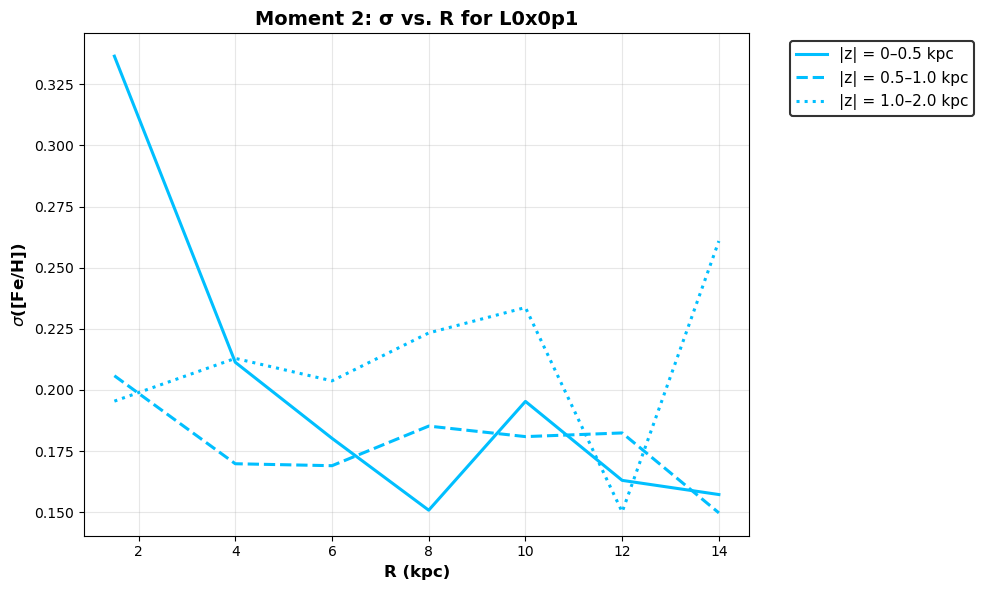

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x0p1 Sigma Arrays (σ)
sigma_z0_0p1 = [
    0.3365,
    0.2113,
    0.1802,
    0.1508,
    0.1953,
    0.1630,
    0.1572
]
sigma_z1_0p1 = [
    0.2058,
    0.1698,
    0.1690,
    0.1852,
    0.1809,
    0.1824,
    0.1497
]
sigma_z2_0p1 = [
    0.1954,
    0.2129,
    0.2037,
    0.2233,
    0.2337,
    0.1501,
    0.2609
]

plt.figure(figsize=(10,6))

plt.plot(R, sigma_z0_0p1, color='deepskyblue', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, sigma_z1_0p1, color='deepskyblue', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, sigma_z2_0p1, color='deepskyblue', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\sigma$([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 2: σ vs. R for L0x0p1", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


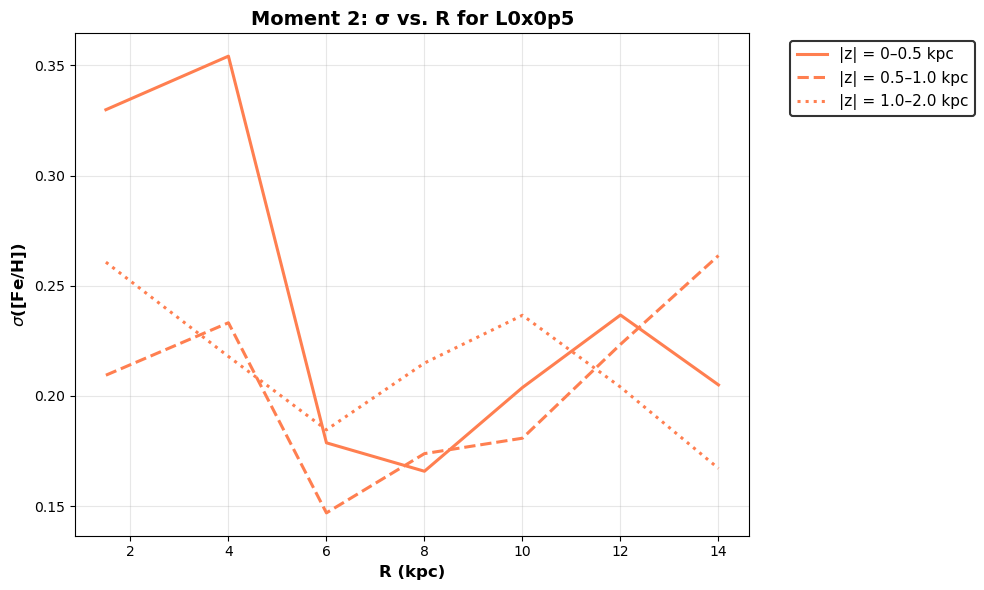

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x0p5 Sigma Arrays (σ)
sigma_z0_0p5 = [
    0.3299,
    0.3542,
    0.1787,
    0.1658,
    0.2038,
    0.2367,
    0.2050
]
sigma_z1_0p5 = [
    0.2094,
    0.2332,
    0.1469,
    0.1738,
    0.1808,
    0.2234,
    0.2637
]
sigma_z2_0p5 = [
    0.2607,
    0.2179,
    0.1846,
    0.2149,
    0.2366,
    0.2040,
    0.1671
]

plt.figure(figsize=(10,6))

plt.plot(R, sigma_z0_0p5, color='coral', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, sigma_z1_0p5, color='coral', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, sigma_z2_0p5, color='coral', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\sigma$([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 2: σ vs. R for L0x0p5", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



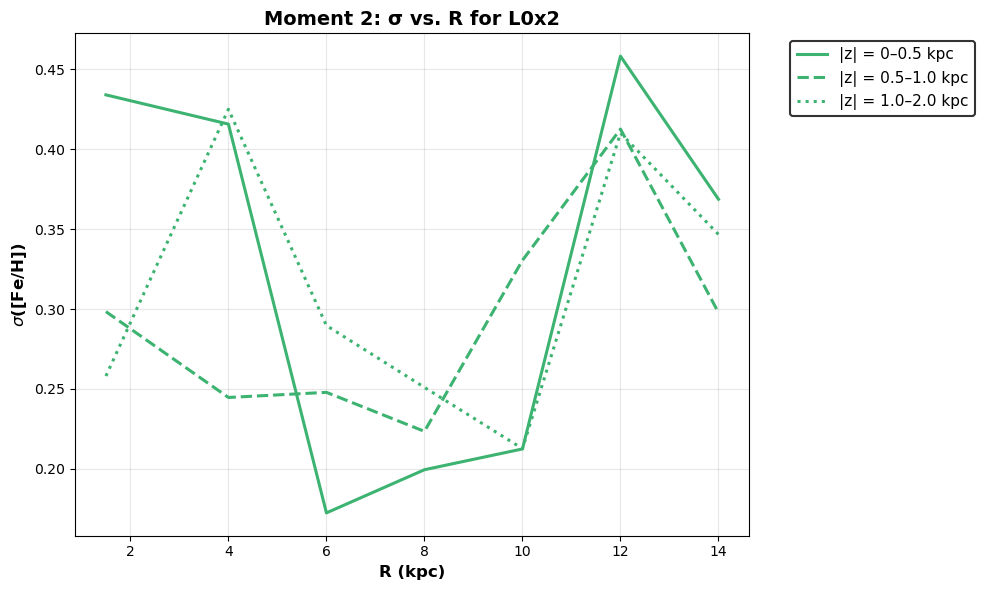

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x2 Sigma Arrays (σ)
sigma_z0_x2 = [
    0.4340,
    0.4157,
    0.1725,
    0.1995,
    0.2125,
    0.4582,
    0.3687
]

sigma_z1_x2 = [
    0.2984,
    0.2447,
    0.2479,
    0.2235,
    0.3305,
    0.4126,
    0.2978
]

sigma_z2_x2 = [
    0.2581,
    0.4250,
    0.2897,
    0.2510,
    0.2127,
    0.4101,
    0.3467
]

plt.figure(figsize=(10,6))

plt.plot(R, sigma_z0_x2, color='mediumseagreen', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, sigma_z1_x2, color='mediumseagreen', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, sigma_z2_x2, color='mediumseagreen', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel(r"$\sigma$([Fe/H])", fontsize=12, fontweight='bold')
plt.title("Moment 2: σ vs. R for L0x2", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



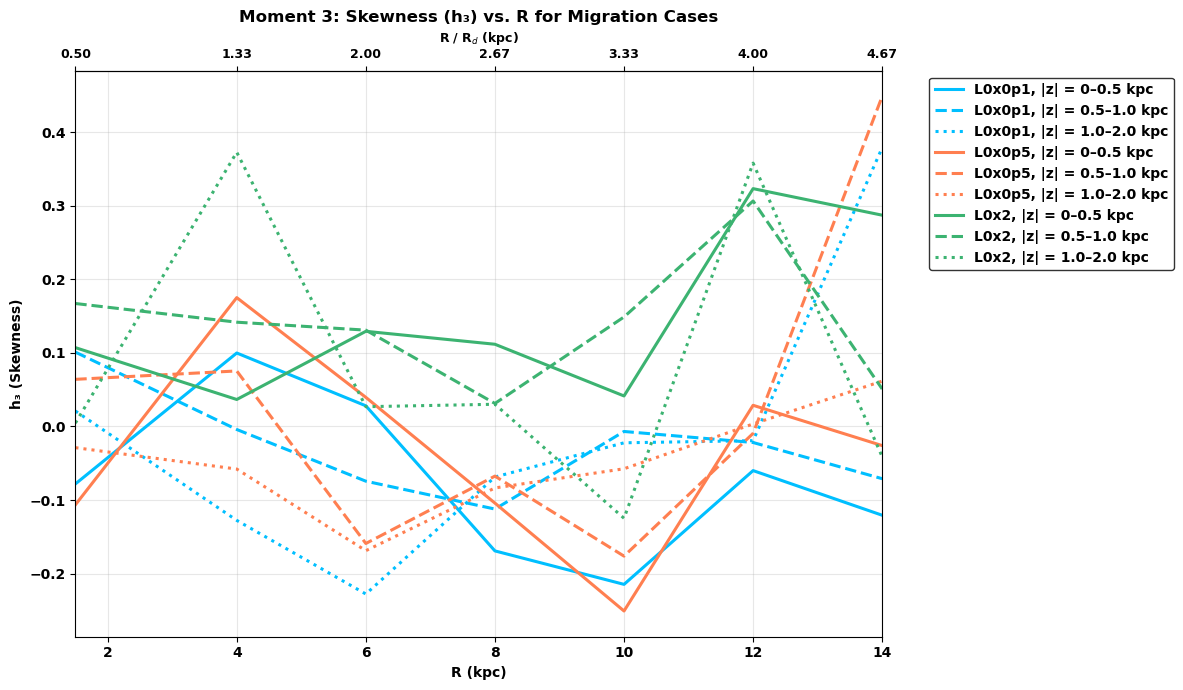

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ------------------------------
# Moment 3: Skewness h3 values (NEW VALUES)
# ------------------------------

L0x0p1 = {
    'z0': [-0.0781,  0.0999,  0.0281, -0.1692, -0.2147, -0.0600, -0.1207],
    'z1': [ 0.1011, -0.0041, -0.0744, -0.1123, -0.0068, -0.0218, -0.0710],
    'z2': [ 0.0210, -0.1277, -0.2278, -0.0687, -0.0222, -0.0193,  0.3791]
}

L0x0p5 = {
    'z0': [-0.1065,  0.1752,  0.0396, -0.1042, -0.2509,  0.0288, -0.0260],
    'z1': [ 0.0641,  0.0755, -0.1591, -0.0675, -0.1763, -0.0094,  0.4489],
    'z2': [-0.0288, -0.0579, -0.1689, -0.0836, -0.0575,  0.0034,  0.0617]
}

L0x2 = {
    'z0': [ 0.1072,  0.0367,  0.1294,  0.1118,  0.0415,  0.3234,  0.2873],
    'z1': [ 0.1672,  0.1418,  0.1310,  0.0313,  0.1489,  0.3066,  0.0510],
    'z2': [ 0.0046,  0.3729,  0.0269,  0.0302, -0.1248,  0.3581, -0.0411]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

linestyles = {'z0': '-', 'z1': '--', 'z2': ':'}

zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(12, 7))

for cname, vals in cases.items():
    for zbin, mu_vals in vals.items():
        plt.plot(
            R, mu_vals,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,
            label=f"{cname}, {zlabels[zbin]}"
        )

# 🔥 FIX SIDE PADDING (chop off sides)
plt.xlim(R[0], R[-1])


# ------------------------------
# Add R/Rd top axis
# ------------------------------

def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)", fontsize=9, fontweight='bold')
ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)],
                       fontsize=9, fontweight='bold')


# ------------------------------
# Labels & Title
# ------------------------------
plt.xlabel("R (kpc)", fontsize=10, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=10, fontweight='bold')
plt.title("Moment 3: Skewness (h₃) vs. R for Migration Cases", fontsize=12, fontweight='bold')

# --------------------------------
# Grid
# --------------------------------
plt.grid(alpha=0.3)

# --------------------------------
# Legend (boxed + bold)
# --------------------------------
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                 fontsize=10, frameon=True)

frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.0)

for text in leg.get_texts():
    text.set_fontweight('bold')

# --------------------------------
# Tick label bolding
# --------------------------------
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()


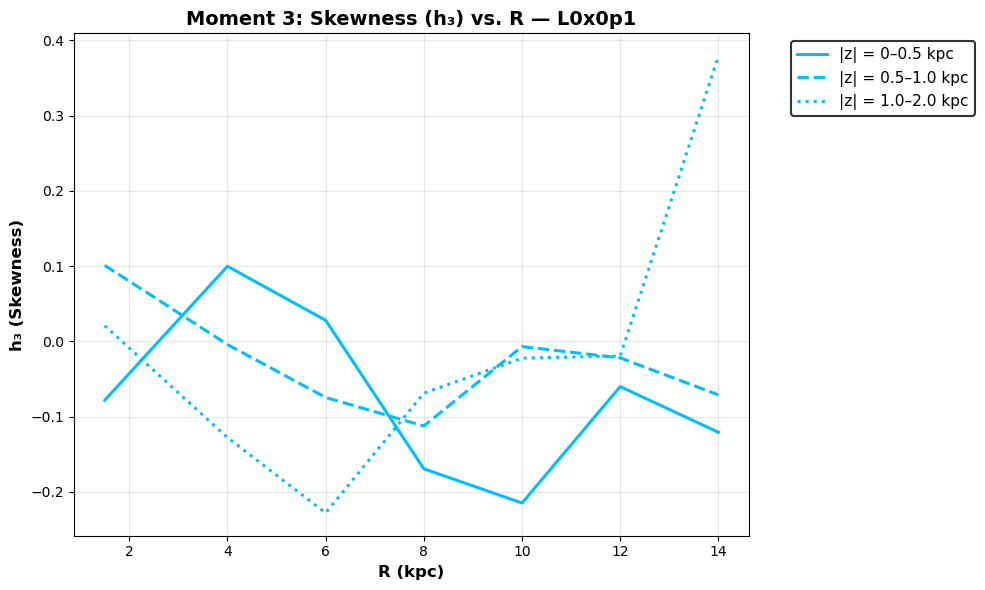

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x0p1 — Skewness h₃ Arrays
h3_z0_0p1 = [
    -0.0781,   # R = 0–3
    +0.0999,   # R = 3–5
    +0.0281,   # R = 5–7
    -0.1692,   # R = 7–9
    -0.2147,   # R = 9–11
    -0.0600,   # R = 11–13
    -0.1207    # R = 13–15
]

h3_z1_0p1 = [
    +0.1011,   # R = 0–3
    -0.0041,   # R = 3–5
    -0.0744,   # R = 5–7
    -0.1123,   # R = 7–9
    -0.0068,   # R = 9–11
    -0.0218,   # R = 11–13
    -0.0710    # R = 13–15
]

h3_z2_0p1 = [
    +0.0210,   # R = 0–3
    -0.1277,   # R = 3–5
    -0.2278,   # R = 5–7
    -0.0687,   # R = 7–9
    -0.0222,   # R = 9–11
    -0.0193,   # R = 11–13
    +0.3791    # R = 13–15    << THE ICONIC SPIKE
]

plt.figure(figsize=(10,6))

plt.plot(R, h3_z0_0p1, color='deepskyblue', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, h3_z1_0p1, color='deepskyblue', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, h3_z2_0p1, color='deepskyblue', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=12, fontweight='bold')
plt.title("Moment 3: Skewness (h₃) vs. R — L0x0p1", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




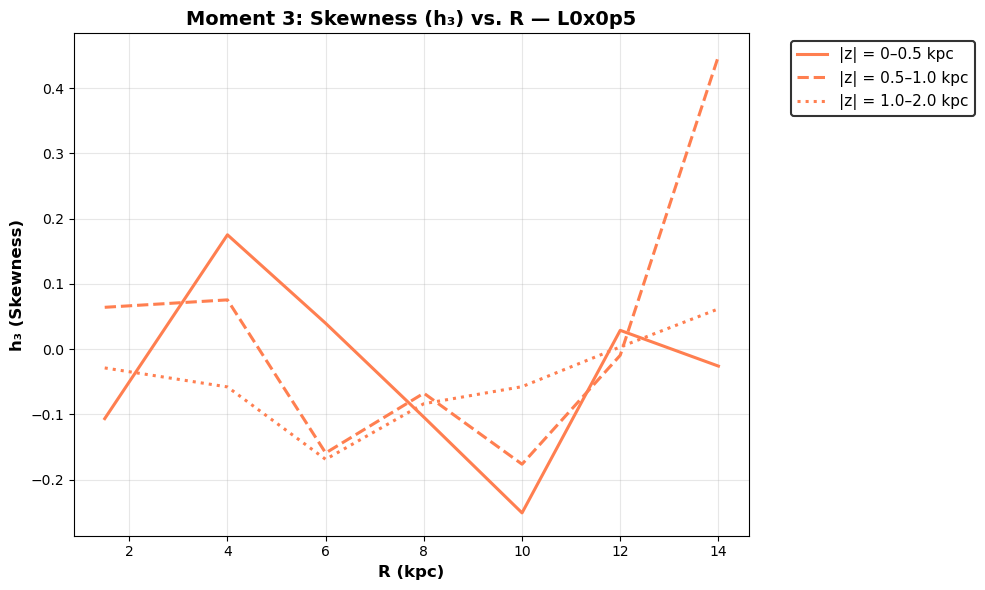

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x0p5 — Skewness h₃ Arrays
h3_z0_0p5 = [
    -0.1065,   # R = 0–3
    +0.1752,   # R = 3–5
    +0.0396,   # R = 5–7
    -0.1042,   # R = 7–9
    -0.2509,   # R = 9–11
    +0.0288,   # R = 11–13
    -0.0260    # R = 13–15
]

h3_z1_0p5 = [
    +0.0641,   # R = 0–3
    +0.0755,   # R = 3–5
    -0.1591,   # R = 5–7
    -0.0675,   # R = 7–9
    -0.1763,   # R = 9–11
    -0.0094,   # R = 11–13
    +0.4489    # R = 13–15   << 🚨 INSANE SPIKE ALERT 🚨
]

h3_z2_0p5 = [
    -0.0288,   # R = 0–3
    -0.0579,   # R = 3–5
    -0.1689,   # R = 5–7
    -0.0836,   # R = 7–9
    -0.0575,   # R = 9–11
    +0.0034,   # R = 11–13
    +0.0617    # R = 13–15
]

plt.figure(figsize=(10,6))

plt.plot(R, h3_z0_0p5, color='coral', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, h3_z1_0p5, color='coral', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, h3_z2_0p5, color='coral', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=12, fontweight='bold')
plt.title("Moment 3: Skewness (h₃) vs. R — L0x0p5", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




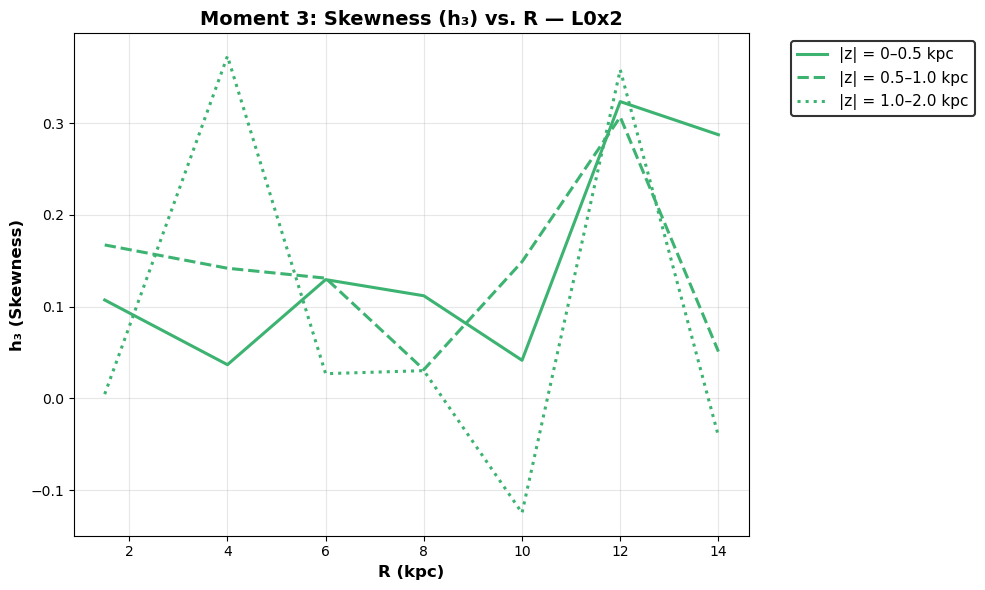

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# L0x2— Skewness h₃ Arrays
h3_z0_x2 = [
    0.1072,   # R = 0–3
    0.0367,   # R = 3–5
    0.1294,   # R = 5–7
    0.1118,   # R = 7–9
    0.0415,   # R = 9–11
    0.3234,   # R = 11–13
    0.2873    # R = 13–15
]

h3_z1_x2 = [
    0.1672,   # R = 0–3
    0.1418,   # R = 3–5
    0.1310,   # R = 5–7
    0.0313,   # R = 7–9
    0.1489,   # R = 9–11
    0.3066,   # R = 11–13
    0.0510    # R = 13–15
]

h3_z2_x2 = [
    0.0046,    # R = 0–3
    0.3729,    # R = 3–5
    0.0269,    # R = 5–7
    0.0302,    # R = 7–9
    -0.1248,   # R = 9–11
    0.3581,    # R = 11–13
    -0.0411    # R = 13–15
]


plt.figure(figsize=(10,6))

plt.plot(R, h3_z0_x2, color='mediumseagreen', linestyle='-',  linewidth=2.2, label='|z| = 0–0.5 kpc')
plt.plot(R, h3_z1_x2, color='mediumseagreen', linestyle='--', linewidth=2.2, label='|z| = 0.5–1.0 kpc')
plt.plot(R, h3_z2_x2, color='mediumseagreen', linestyle=':',  linewidth=2.2, label='|z| = 1.0–2.0 kpc')

plt.xlabel("R (kpc)", fontsize=12, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=12, fontweight='bold')
plt.title("Moment 3: Skewness (h₃) vs. R — L0x2", fontsize=14, fontweight='bold')

leg = plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=11, frameon=True)
frame = leg.get_frame()
frame.set_edgecolor('black'); frame.set_linewidth(1.5)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

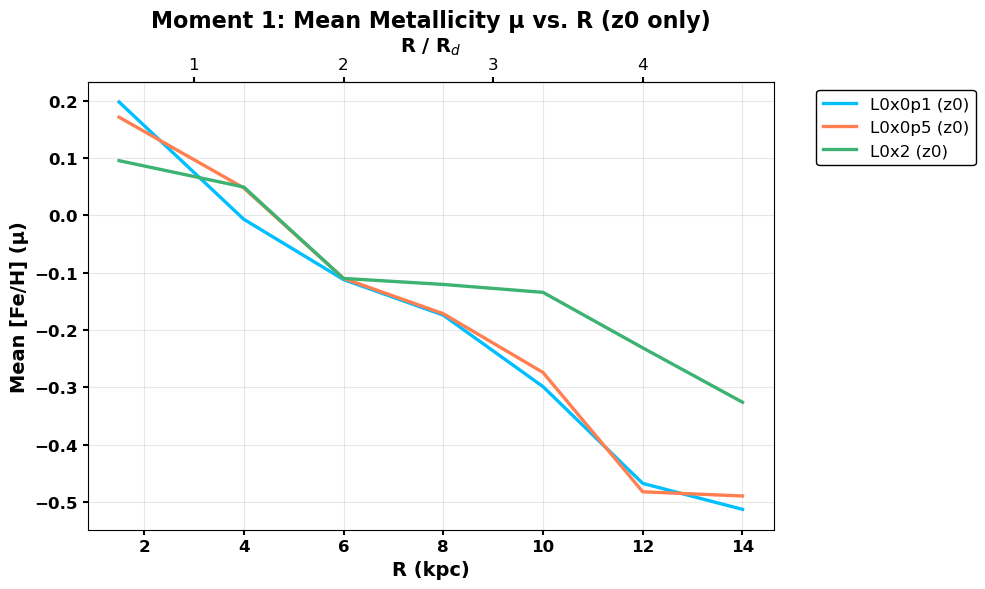

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Mean μ for z0 only (0–0.5 kpc)
# -----------------------------------
mu_0p1 = [0.1976, -0.0068, -0.1119, -0.1739, -0.2985, -0.4672, -0.5124]
mu_0p5 = [0.1711, 0.0478, -0.1098, -0.1714, -0.2738, -0.4818, -0.4891]
mu_x2  = [0.0953, 0.0494, -0.1099, -0.1204, -0.1342, -0.2309, -0.3257]

# Colors for migration strength
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z0
# (same line style = solid)
# -----------------------------------
plt.plot(R, mu_0p1, color=colors['0p1'], linestyle='-', linewidth=2.4,
         label='L0x0p1 (z0)')
plt.plot(R, mu_0p5, color=colors['0p5'], linestyle='-', linewidth=2.4,
         label='L0x0p5 (z0)')
plt.plot(R, mu_x2,  color=colors['x2'],  linestyle='-', linewidth=2.4,
         label='L0x2 (z0)')

# -----------------------------------
# Secondary top axis R/Rd
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels, title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("Mean [Fe/H] (μ)", fontsize=14, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R (z0 only)", fontsize=16, fontweight='bold')

# -----------------------------------
# Tick boldness
# -----------------------------------
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


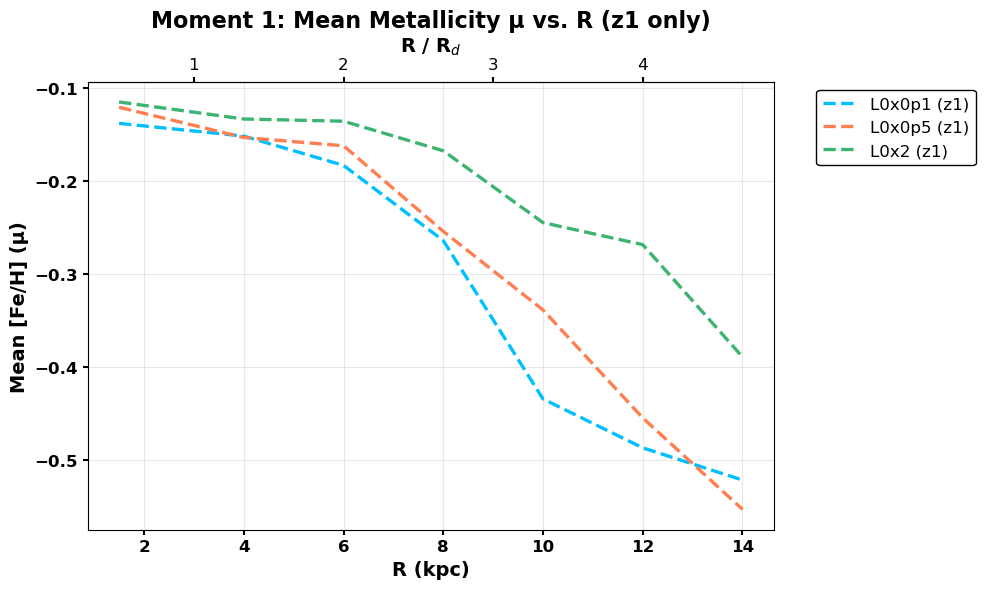

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Mean μ for z1 only (0.5–1.0 kpc)
# -----------------------------------
mu_0p1 = [-0.1382, -0.1519, -0.1834, -0.2643, -0.4347, -0.4873, -0.5220]
mu_0p5 = [-0.1209, -0.1534, -0.1623, -0.2544, -0.3390, -0.4551, -0.5535]
mu_x2  = [-0.1152, -0.1335, -0.1359, -0.1677, -0.2450, -0.2687, -0.3895]

# Colors for migration strength
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z1
# SAME LINE STYLE = dashed
# -----------------------------------
plt.plot(R, mu_0p1, color=colors['0p1'], linestyle='--', linewidth=2.4,
         label='L0x0p1 (z1)')
plt.plot(R, mu_0p5, color=colors['0p5'], linestyle='--', linewidth=2.4,
         label='L0x0p5 (z1)')
plt.plot(R, mu_x2,  color=colors['x2'],  linestyle='--', linewidth=2.4,
         label='L0x2 (z1)')

# -----------------------------------
# Secondary top axis R/Rd
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels and Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("Mean [Fe/H] (μ)", fontsize=14, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R (z1 only)", fontsize=16, fontweight='bold')

# -----------------------------------
# Tick boldness
# -----------------------------------
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


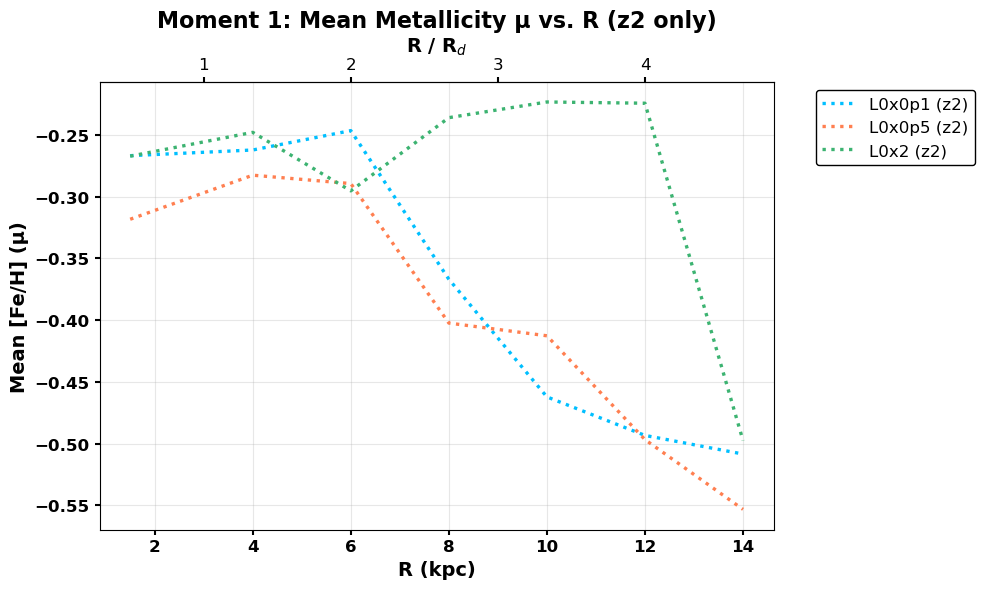

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Mean μ for z2 only (1.0–2.0 kpc)
# -----------------------------------
mu_0p1 = [-0.2668, -0.2622, -0.2465, -0.3669, -0.4622, -0.4934, -0.5085]
mu_0p5 = [-0.3183, -0.2826, -0.2894, -0.4024, -0.4127, -0.4968, -0.5533]
mu_x2  = [-0.2672, -0.2479, -0.2953, -0.2360, -0.2233, -0.2243, -0.4976]

# Migration colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z2
# SAME LINE STYLE = dashed
# -----------------------------------
plt.plot(R, mu_0p1, color=colors['0p1'], linestyle=':', linewidth=2.4,
         label='L0x0p1 (z2)')
plt.plot(R, mu_0p5, color=colors['0p5'], linestyle=':', linewidth=2.4,
         label='L0x0p5 (z2)')
plt.plot(R, mu_x2,  color=colors['x2'],  linestyle=':', linewidth=2.4,
         label='L0x2 (z2)')

# -----------------------------------
# Secondary top axis: R/Rd
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels and Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("Mean [Fe/H] (μ)", fontsize=14, fontweight='bold')
plt.title("Moment 1: Mean Metallicity μ vs. R (z2 only)", fontsize=16, fontweight='bold')

# -----------------------------------
# Tick boldness
# -----------------------------------
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


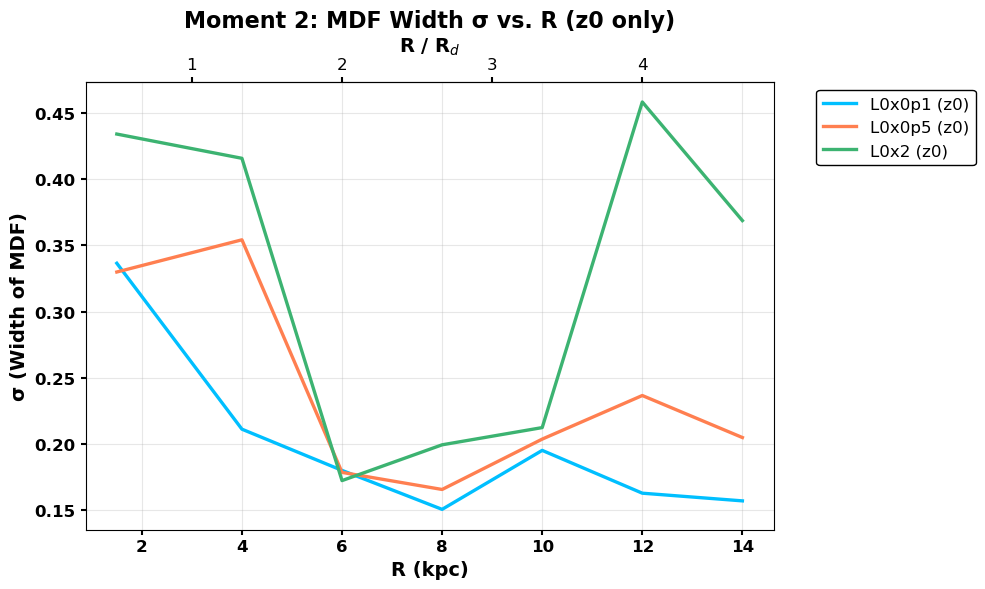

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Sigma σ for z0 only (0–0.5 kpc)
# -----------------------------------
sigma_0p1 = [0.3365, 0.2113, 0.1802, 0.1508, 0.1953, 0.1630, 0.1572]
sigma_0p5 = [0.3299, 0.3542, 0.1787, 0.1658, 0.2038, 0.2367, 0.2050]
sigma_x2  = [0.4340, 0.4157, 0.1725, 0.1995, 0.2125, 0.4582, 0.3687]

# Migration colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z0
# SAME LINE STYLE (solid)
# -----------------------------------
plt.plot(R, sigma_0p1, color=colors['0p1'], linestyle='-', linewidth=2.4,
         label='L0x0p1 (z0)')
plt.plot(R, sigma_0p5, color=colors['0p5'], linestyle='-', linewidth=2.4,
         label='L0x0p5 (z0)')
plt.plot(R, sigma_x2,  color=colors['x2'],  linestyle='-', linewidth=2.4,
         label='L0x2 (z0)')

# -----------------------------------
# Secondary top axis: R/Rd
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels and Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("σ (Width of MDF)", fontsize=14, fontweight='bold')
plt.title("Moment 2: MDF Width σ vs. R (z0 only)", fontsize=16, fontweight='bold')

# -----------------------------------
# Tick boldness
# -----------------------------------
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


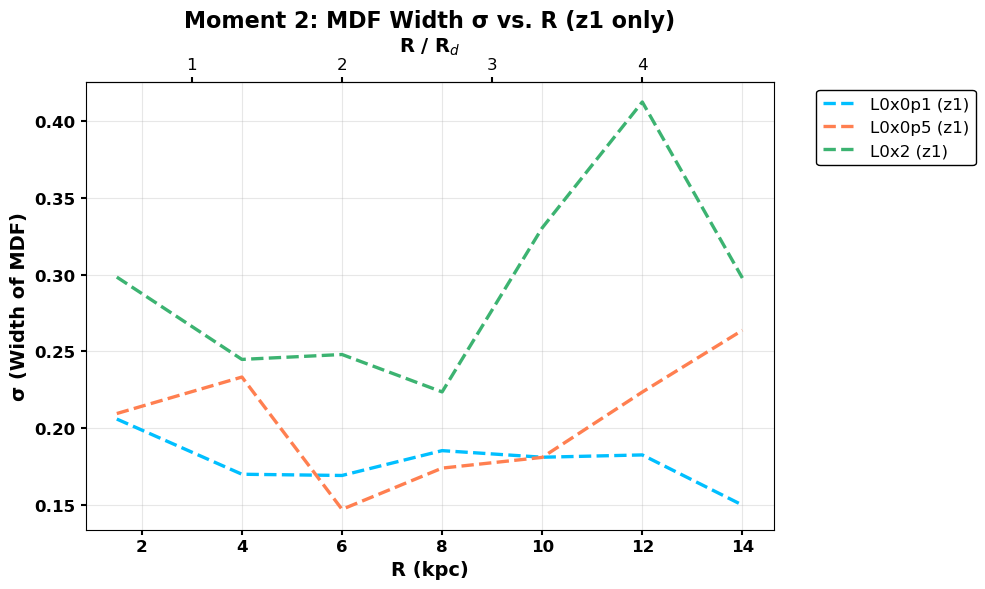

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Sigma σ for z1 only (0.5–1.0 kpc)
# -----------------------------------
sigma_0p1 = [0.2058, 0.1698, 0.1690, 0.1852, 0.1809, 0.1824, 0.1497]
sigma_0p5 = [0.2094, 0.2332, 0.1469, 0.1738, 0.1808, 0.2234, 0.2637]
sigma_x2  = [0.2984, 0.2447, 0.2479, 0.2235, 0.3305, 0.4126, 0.2978]

# Colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z1
# SAME LINE STYLE (solid)
# -----------------------------------
plt.plot(R, sigma_0p1, color=colors['0p1'], linestyle='--', linewidth=2.4,
         label='L0x0p1 (z1)')
plt.plot(R, sigma_0p5, color=colors['0p5'],  linestyle='--', linewidth=2.4,
         label='L0x0p5 (z1)')
plt.plot(R, sigma_x2,  color=colors['x2'],  linestyle='--', linewidth=2.4,
         label='L0x2 (z1)')

# -----------------------------------
# Secondary top axis: R/Rd
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels and Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("σ (Width of MDF)", fontsize=14, fontweight='bold')
plt.title("Moment 2: MDF Width σ vs. R (z1 only)", fontsize=16, fontweight='bold')

# -----------------------------------
# Tick boldness
# -----------------------------------
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


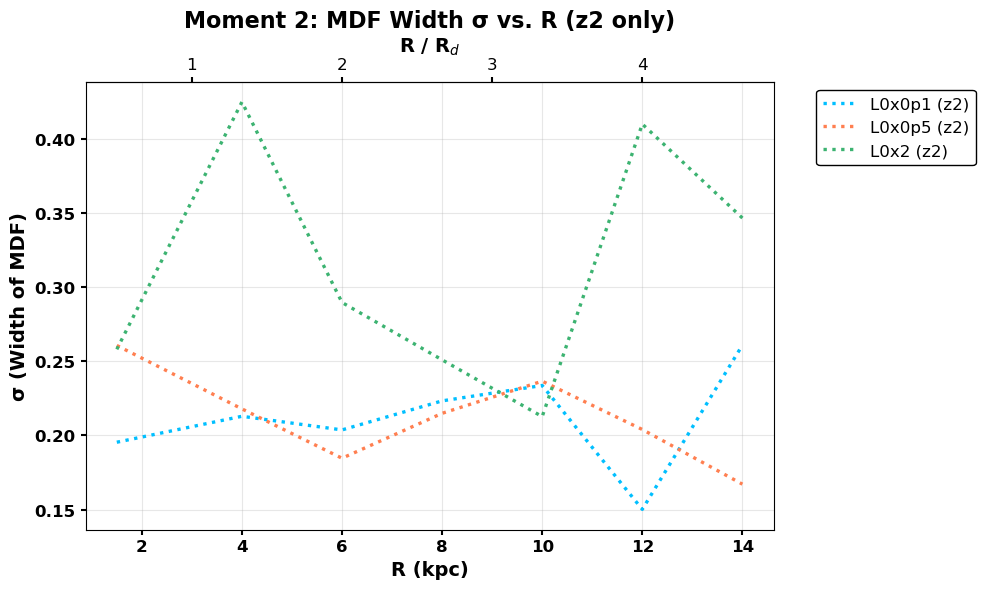

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# Sigma σ for z2 (1.0–2.0 kpc)
# -----------------------------------
sigma_0p1 = [0.1954, 0.2129, 0.2037, 0.2233, 0.2337, 0.1501, 0.2609]
sigma_0p5 = [0.2607, 0.2179, 0.1846, 0.2149, 0.2366, 0.2040, 0.1671]
sigma_x2  = [0.2581, 0.4250, 0.2897, 0.2510, 0.2127, 0.4101, 0.3467]

# Colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# -----------------------------------
# Plot all migration cases for z2
# SAME LINE STYLE (solid)
# -----------------------------------
plt.plot(R, sigma_0p1, color=colors['0p1'], linestyle=':', linewidth=2.4,
         label='L0x0p1 (z2)')
plt.plot(R, sigma_0p5, color=colors['0p5'], linestyle=':', linewidth=2.4,
         label='L0x0p5 (z2)')
plt.plot(R, sigma_x2,  color=colors['x2'],  linestyle=':', linewidth=2.4,
         label='L0x2 (z2)')

# -----------------------------------
# Secondary top axis (R/Rd)
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels & Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("σ (Width of MDF)", fontsize=14, fontweight='bold')
plt.title("Moment 2: MDF Width σ vs. R (z2 only)", fontsize=16, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


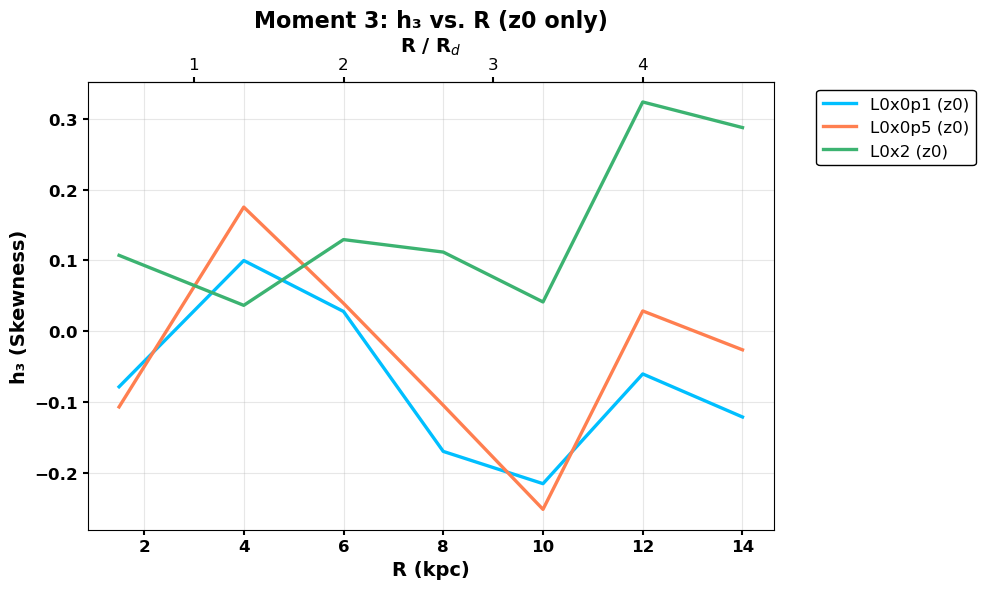

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# h3 skewness for z0 (0–0.5 kpc)
# -----------------------------------
h3_0p1 = [-0.0781, 0.0999, 0.0281, -0.1692, -0.2147, -0.0600, -0.1207]
h3_0p5 = [-0.1065, 0.1752, 0.0396, -0.1042, -0.2509, 0.0288, -0.0260]
h3_x2  = [0.1072, 0.0367, 0.1294, 0.1118, 0.0415, 0.3234, 0.2873]

# Colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# SAME LINE STYLE for all migration cases
plt.plot(R, h3_0p1, color=colors['0p1'], linestyle='-', linewidth=2.4,
         label='L0x0p1 (z0)')
plt.plot(R, h3_0p5, color=colors['0p5'], linestyle='-', linewidth=2.4,
         label='L0x0p5 (z0)')
plt.plot(R, h3_x2,  color=colors['x2'],  linestyle='-', linewidth=2.4,
         label='L0x2 (z0)')

# -----------------------------------
# R/Rd top axis (Rd = 3 kpc)
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels & Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=14, fontweight='bold')
plt.title("Moment 3: h₃ vs. R (z0 only)", fontsize=16, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


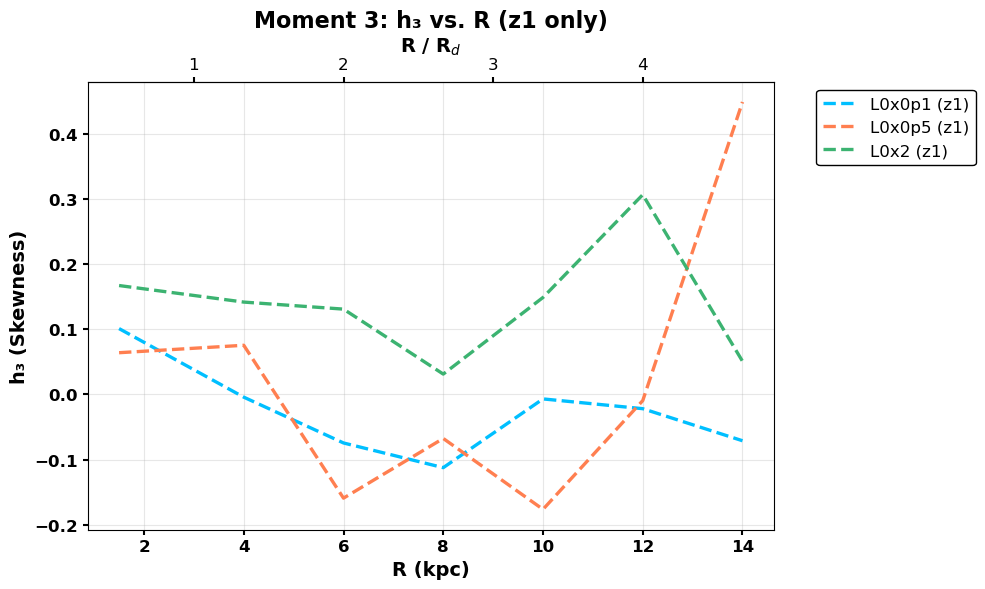

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# -----------------------------------
# h3 skewness for z1 (0.5–1.0 kpc)
# -----------------------------------
h3_0p1 = [0.1011, -0.0041, -0.0744, -0.1123, -0.0068, -0.0218, -0.0710]
h3_0p5 = [0.0641, 0.0755, -0.1591, -0.0675, -0.1763, -0.0094, 0.4489]
h3_x2  = [0.1672, 0.1418, 0.1310, 0.0313, 0.1489, 0.3066, 0.0510]

# Colors
colors = {
    '0p1': 'deepskyblue',
    '0p5': 'coral',
    'x2': 'mediumseagreen'
}

plt.figure(figsize=(10, 6))

# SAME LINE STYLE for all migration cases
plt.plot(R, h3_0p1, color=colors['0p1'], linestyle='--', linewidth=2.4,
         label='L0x0p1 (z1)')
plt.plot(R, h3_0p5, color=colors['0p5'], linestyle='--', linewidth=2.4,
         label='L0x0p5 (z1)')
plt.plot(R, h3_x2,  color=colors['x2'],  linestyle='--', linewidth=2.4,
         label='L0x2 (z1)')

# -----------------------------------
# R/Rd top axis (Rd = 3 kpc)
# -----------------------------------
def R_to_Rd(R): return R / 3.0
def Rd_to_R(Rd): return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=14, fontweight='bold')
ax_top.tick_params(labelsize=12, width=1.5)

# -----------------------------------
# Labels & Title
# -----------------------------------
plt.xlabel("R (kpc)", fontsize=14, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=14, fontweight='bold')
plt.title("Moment 3: h₃ vs. R (z1 only)", fontsize=16, fontweight='bold')

# Bold tick labels
ax.tick_params(axis='both', labelsize=12, width=1.5)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# -----------------------------------
# Legend (boxed)
# -----------------------------------
plt.legend(
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1.0,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

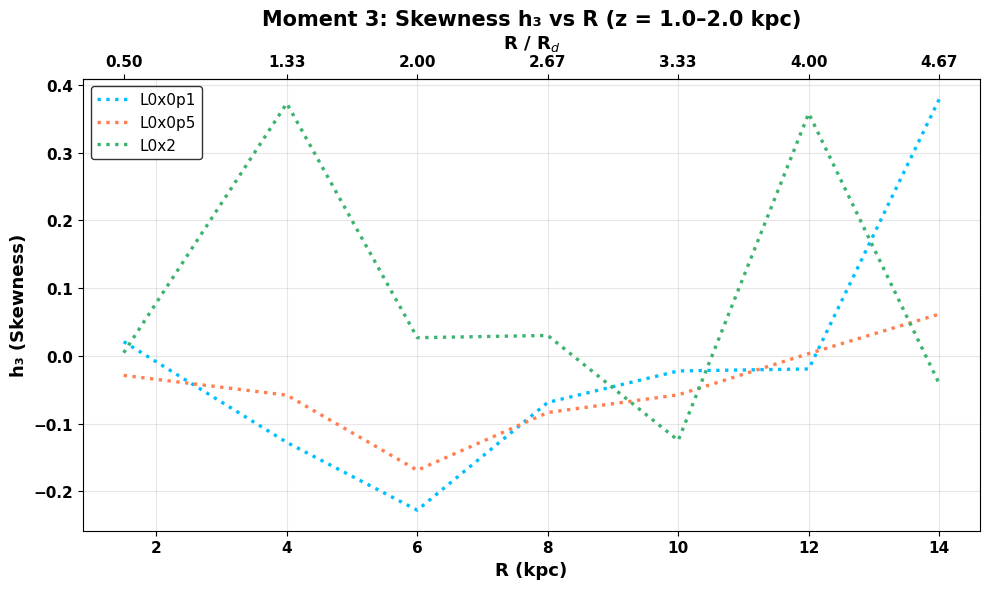

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints (kpc)
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# z2 skewness values
h3_L0x0p1 = [0.0210, -0.1277, -0.2278, -0.0687, -0.0222, -0.0193, 0.3791]
h3_L0x0p5 = [-0.0288, -0.0579, -0.1689, -0.0836, -0.0575, 0.0034, 0.0617]
h3_L0x2   = [0.0046, 0.3729, 0.0269, 0.0302, -0.1248, 0.3581, -0.0411]

# Colors
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

plt.figure(figsize=(10,6))

plt.plot(R, h3_L0x0p1, color=colors['L0x0p1'], linestyle=':', linewidth=2.4, label='L0x0p1')
plt.plot(R, h3_L0x0p5, color=colors['L0x0p5'], linestyle=':', linewidth=2.4, label='L0x0p5')
plt.plot(R, h3_L0x2,   color=colors['L0x2'],   linestyle=':', linewidth=2.4, label='L0x2')

# Top axis R/Rd
def R_to_Rd(R): return R/3.0
def Rd_to_R(Rd): return Rd*3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$", fontsize=13, fontweight='bold')
ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)], fontsize=11, fontweight='bold')

# Labels
plt.xlabel("R (kpc)", fontsize=13, fontweight='bold')
plt.ylabel("h₃ (Skewness)", fontsize=13, fontweight='bold')
plt.title("Moment 3: Skewness h₃ vs R (z = 1.0–2.0 kpc)", fontsize=15, fontweight='bold')

# Format ticks
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')

# Legend with box
plt.legend(frameon=True, edgecolor='black', fontsize=11)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



